## Objective:
### The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively


Importing the modules that I am gonna use 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

Importing the Dataset "cardiographic.csv"

In [2]:
df = pd.read_csv("Cardiotocographic.csv")

#### Dataset Overview

1.	LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.
2.	AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.
3.	FM - May indicate "Fetal Movements" detected by the monitor.
4.	UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.
5.	DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.
6.	DS - May represent "Decelerations Short" or decelerations of brief duration.
7.	DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.
8.	ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.
9.	MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.
10.	ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.
11.	MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.


In [3]:
df.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [4]:
df.tail()

LB        AC        FM        UC   DL   DS   DP  ASTV  MSTV  \
2121  140.0  0.000000  0.961268  0.007426  0.0  0.0  0.0  79.0   0.2   
2122  140.0  0.000775  0.000000  0.006979  0.0  0.0  0.0  78.0   0.4   
2123  140.0  0.000980  0.000000  0.006863  0.0  0.0  0.0  79.0   0.4   
2124  140.0  0.000679  0.000000  0.006110  0.0  0.0  0.0  78.0   0.4   
2125  142.0  0.001616 -0.000188  0.008078  0.0  0.0  0.0  74.0   0.4   

           ALTV  MLTV  Width  Tendency       NSP  
2121  25.000000   7.2   40.0       0.0  2.000000  
2122  22.000000   7.1   66.0       1.0  2.000000  
2123  20.000000   6.1   67.0       1.0  1.990464  
2124  27.000000   7.0   66.0       1.0  2.000000  
2125  35.857183   5.0   42.0       0.0  1.000000

In [5]:
df.shape

(2126, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


#### Data Cleaning and Preparation:

As you can see we got the datatypes correct , but there might be  missing values in our datasets.Let's find and handle the missing datas.

In [7]:
df.isnull().sum() #missing values in each column

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

There are missing values in our dataset. Let's check if the missing values are less than 55 or not.

In [8]:
df.isnull().mean()*100 # %age missing values

LB          0.987770
AC          0.940734
FM          0.000000
UC          0.000000
DL          0.000000
DS          0.987770
DP          0.987770
ASTV        0.000000
MSTV        0.000000
ALTV        0.000000
MLTV        0.987770
Width       0.987770
Tendency    0.987770
NSP         0.987770
dtype: float64

As u can see the columns where datas are missing are less than 5% in every column. Let's cross check it by manually printing the column names where the missing datas are less than 5%.

In [9]:
cols = [i for i in df.columns if df[i].isnull().mean()*100 <= 5 and df[i].isnull().mean()*100 >= 0]
cols

['LB',
 'AC',
 'FM',
 'UC',
 'DL',
 'DS',
 'DP',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'Width',
 'Tendency',
 'NSP']

Above are the columns with missing values less than 5% 

In [10]:
df[cols].sample(5) #sample data of the rows where datas are missing.

LB        AC        FM        UC        DL   DS        DP  ASTV  \
1406  214.0  0.005068  0.000000  0.001689  0.000000  0.0  0.000000  46.0   
1759  120.0  0.002587  0.000000  0.001279  0.010349  0.0  0.000000  58.0   
1512  130.0  0.002907  0.000000  0.007267  0.000000  0.0 -0.000015  33.0   
1251  112.0  0.002924  0.000000  0.004386  0.000000  0.0  0.000000  24.0   
1782  121.0  0.006784  0.002714  0.001357  0.000000  0.0  0.000000  54.0   

          MSTV  ALTV  MLTV  Width  Tendency  NSP  
1406  0.800000   0.0   8.6   67.0       1.0  1.0  
1759  1.202014   0.0   7.3   78.0       0.0  1.0  
1512  1.100000   0.0  16.4   53.0       0.0  1.0  
1251  1.300000   8.0  10.4   40.0      -1.0  1.0  
1782  1.700000   0.0   9.9   73.0       0.0  1.0

Let's find out how much data are we gonna have after we drop the rows with missing values in their columns.

In [11]:
len(df[cols].dropna())/len(df)

0.9901222953904045

Now u can see that we will have more than 99% of data in our dataset after dropping the rown with null values.

Let's drop the rows with missing values and store the datas without any missing values in a new dataset

In [12]:
new_df = df[cols].dropna()

In [13]:
df.shape , new_df.shape  #comparision of old dataset and new dataset's shapes.

((2126, 14), (2105, 14))

array([[<Axes: title={'center': 'LB'}>, <Axes: title={'center': 'AC'}>,
        <Axes: title={'center': 'FM'}>, <Axes: title={'center': 'UC'}>],
       [<Axes: title={'center': 'DL'}>, <Axes: title={'center': 'DS'}>,
        <Axes: title={'center': 'DP'}>, <Axes: title={'center': 'ASTV'}>],
       [<Axes: title={'center': 'MSTV'}>,
        <Axes: title={'center': 'ALTV'}>,
        <Axes: title={'center': 'MLTV'}>,
        <Axes: title={'center': 'Width'}>],
       [<Axes: title={'center': 'Tendency'}>,
        <Axes: title={'center': 'NSP'}>, <Axes: >, <Axes: >]],
      dtype=object)

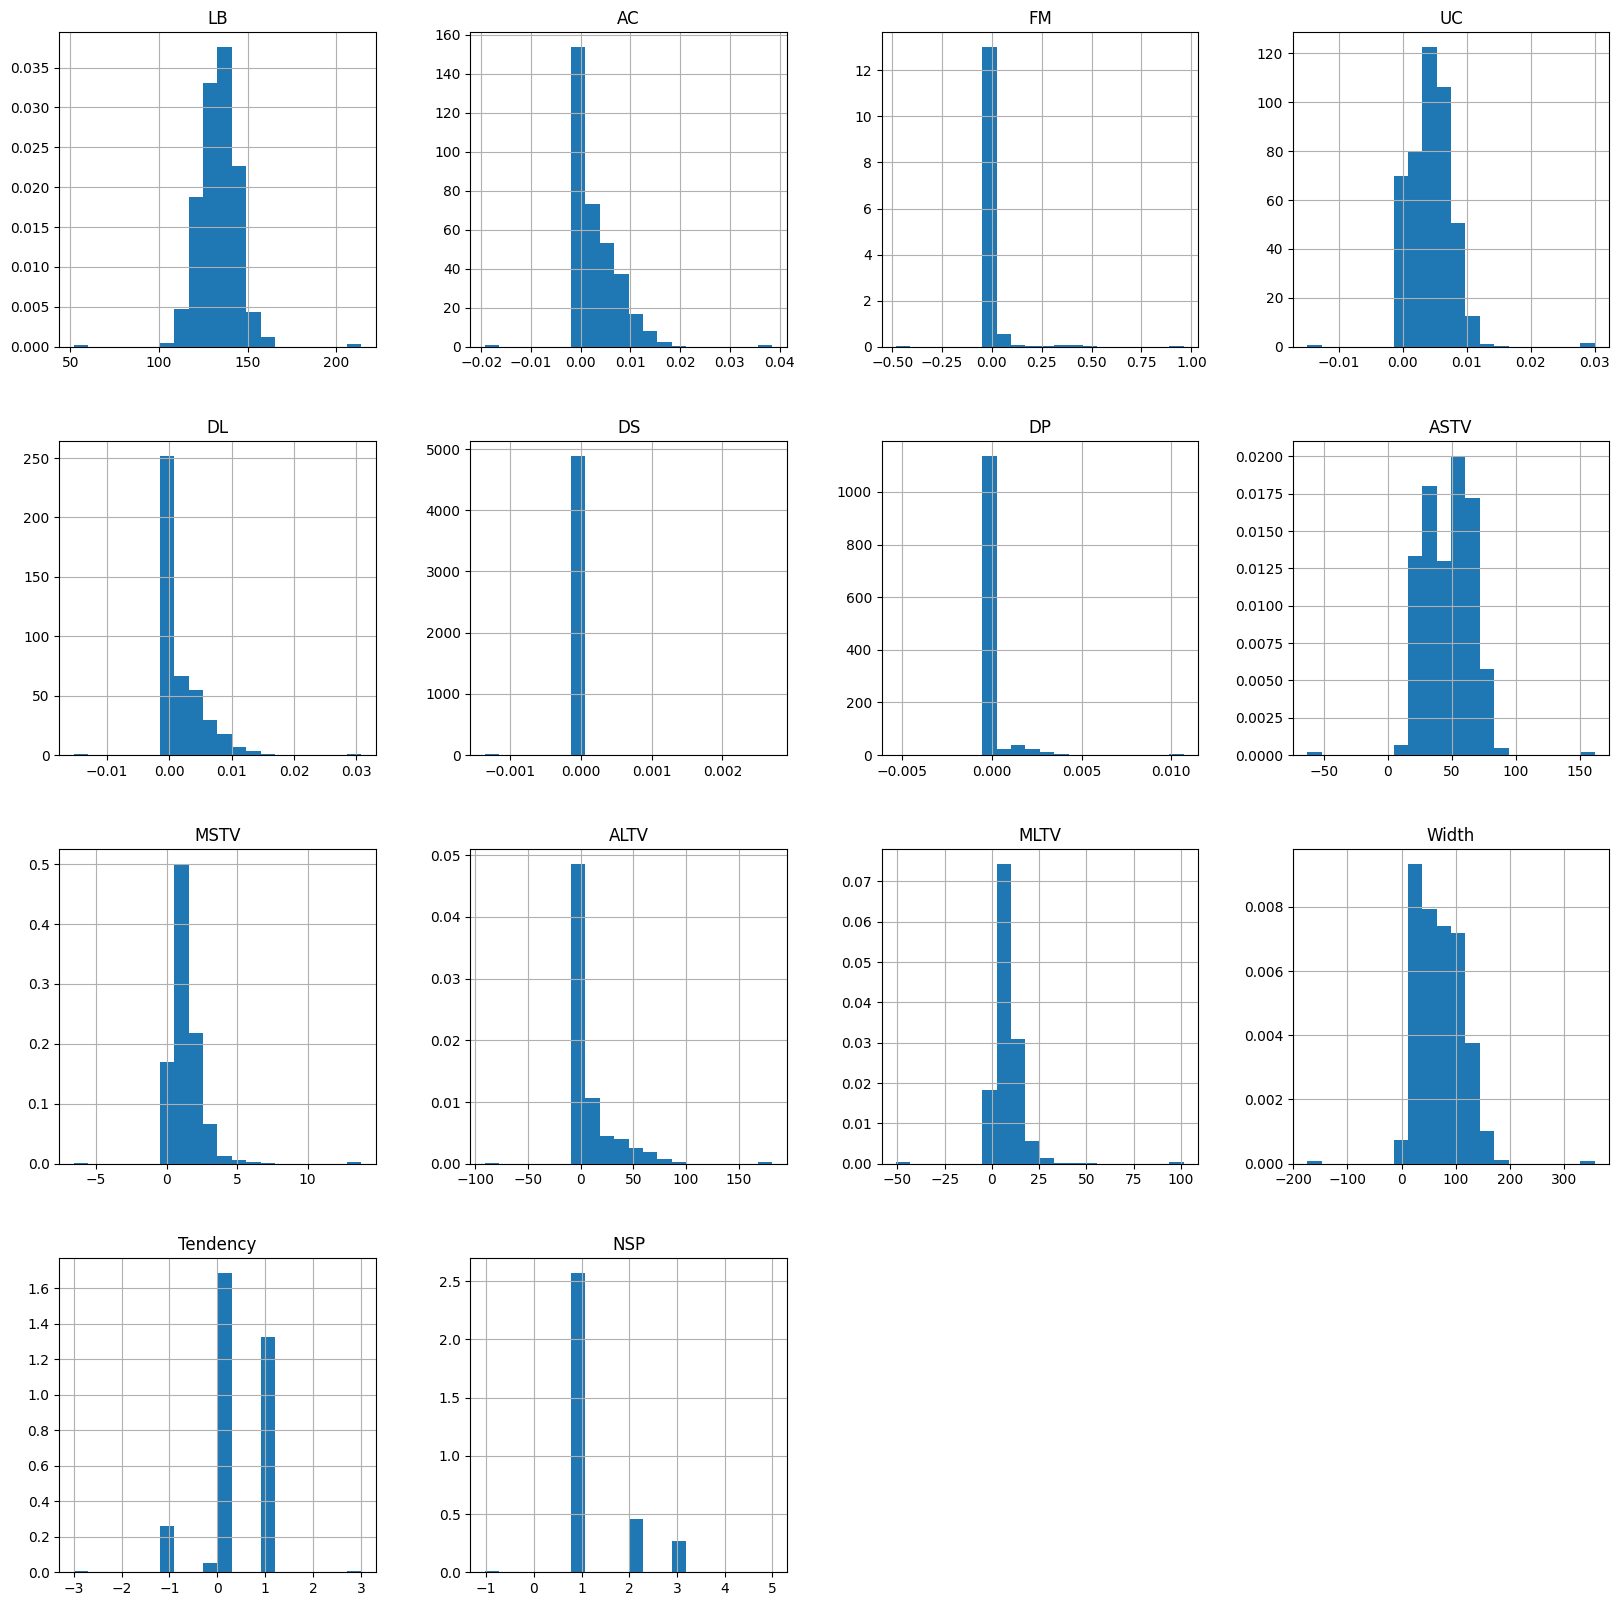

In [14]:
df.hist(bins = 20 , density = True , figsize = (20 , 20)) #data distribution of new dataset before removing the missing values 

array([[<Axes: title={'center': 'LB'}>, <Axes: title={'center': 'AC'}>,
        <Axes: title={'center': 'FM'}>, <Axes: title={'center': 'UC'}>],
       [<Axes: title={'center': 'DL'}>, <Axes: title={'center': 'DS'}>,
        <Axes: title={'center': 'DP'}>, <Axes: title={'center': 'ASTV'}>],
       [<Axes: title={'center': 'MSTV'}>,
        <Axes: title={'center': 'ALTV'}>,
        <Axes: title={'center': 'MLTV'}>,
        <Axes: title={'center': 'Width'}>],
       [<Axes: title={'center': 'Tendency'}>,
        <Axes: title={'center': 'NSP'}>, <Axes: >, <Axes: >]],
      dtype=object)

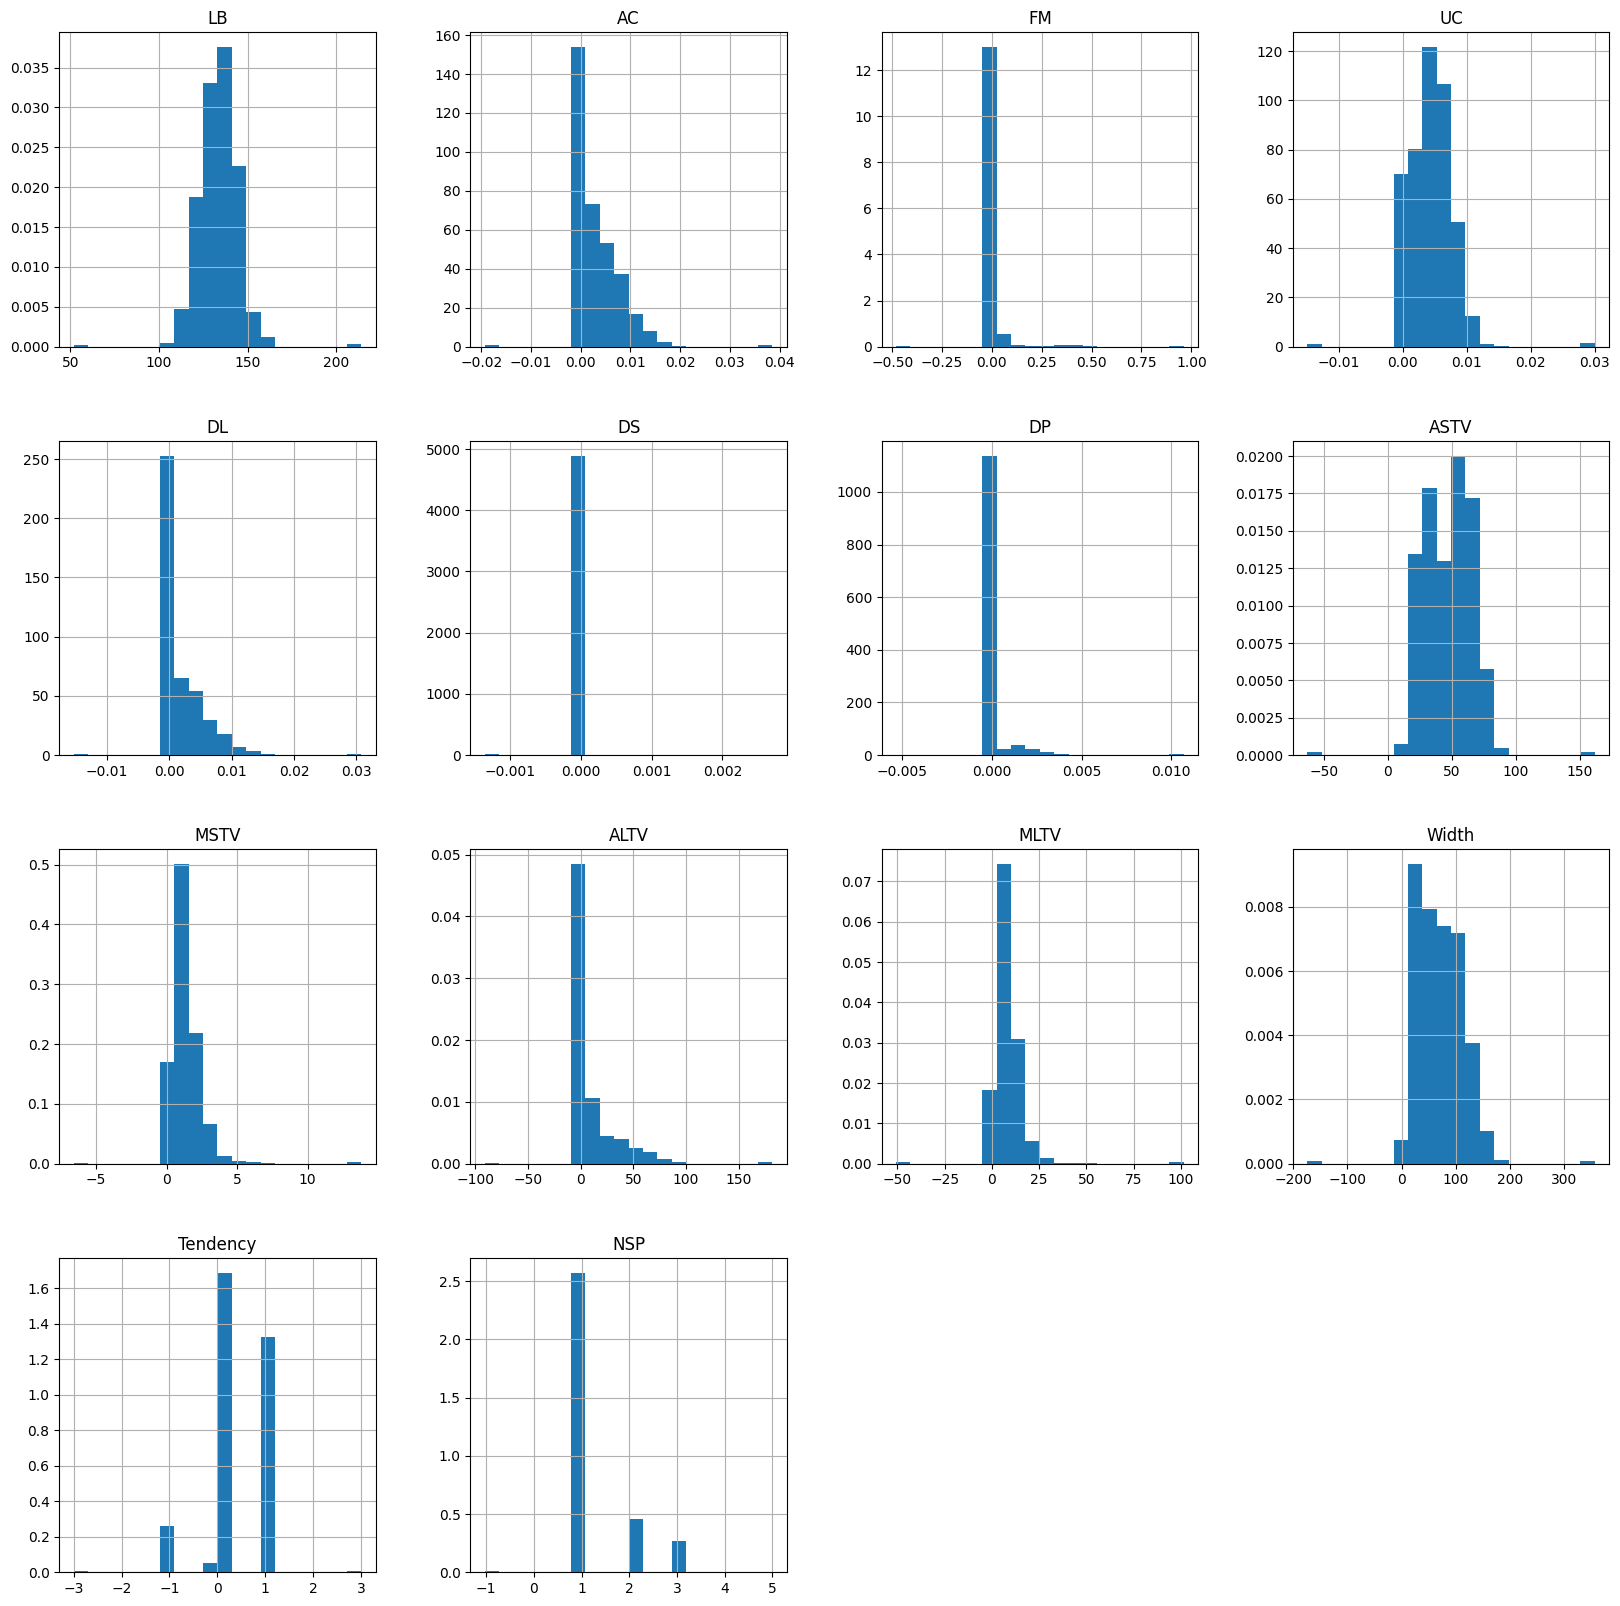

In [15]:
new_df.hist(bins = 20 , density = True , figsize = (20 , 20)) #data distribution of new dataset after removing the missing values 

Now we r gonna compare the data distribution of each column from old dataset where we had missing values present with the dataset distribution of same  columns in new dataset where missing values are removed. 

<Axes: >

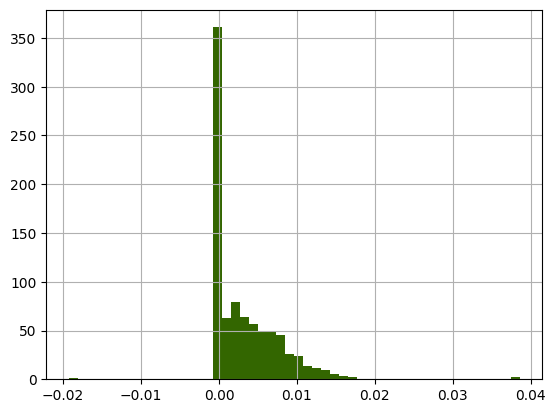

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['AC'].hist(bins = 50 , ax = ax , density = True , color = 'red')
new_df['AC'].hist(bins = 50 , ax = ax , density = True , color = 'green' , alpha = 0.8)

<Axes: >

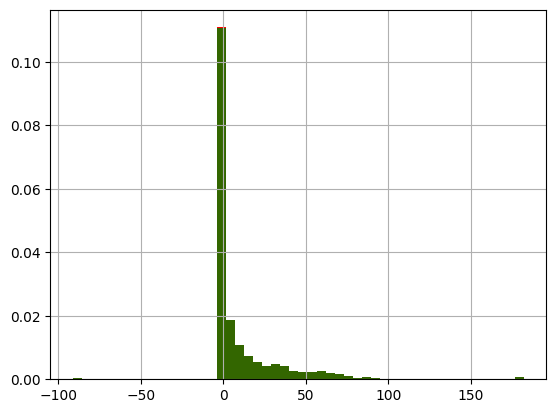

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['ALTV'].hist(bins = 50 , ax = ax , density = True , color = 'red')
new_df['ALTV'].hist(bins = 50 , ax = ax , density = True , color = 'green' , alpha = 0.8)

<Axes: >

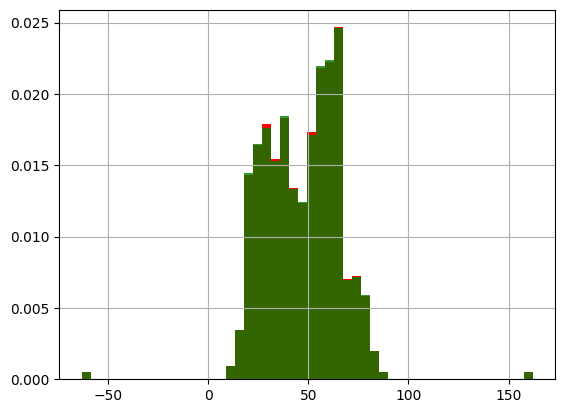

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['ASTV'].hist(bins = 50 , ax = ax , density = True , color = 'red')
new_df['ASTV'].hist(bins = 50 , ax = ax , density = True , color = 'green' , alpha = 0.8)

<Axes: >

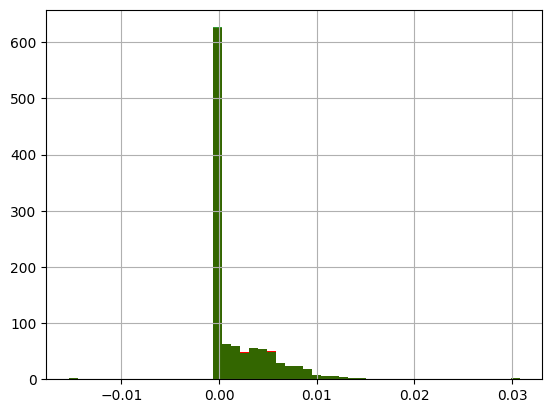

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['DL'].hist(bins = 50 , ax = ax , density = True , color = 'red')
new_df['DL'].hist(bins = 50 , ax = ax , density = True , color = 'green' , alpha = 0.8)

<Axes: >

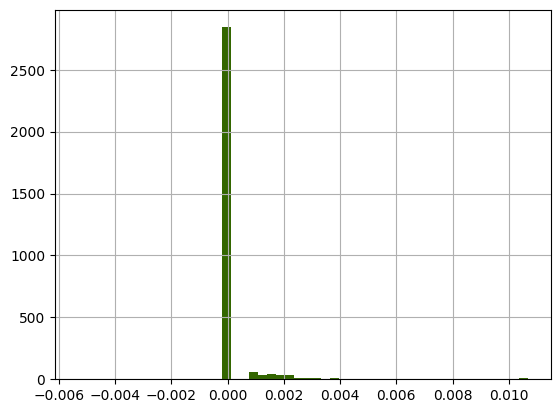

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['DP'].hist(bins = 50 , ax = ax , density = True , color = 'red')
new_df['DP'].hist(bins = 50 , ax = ax , density = True , color = 'green' , alpha = 0.8)

<Axes: >

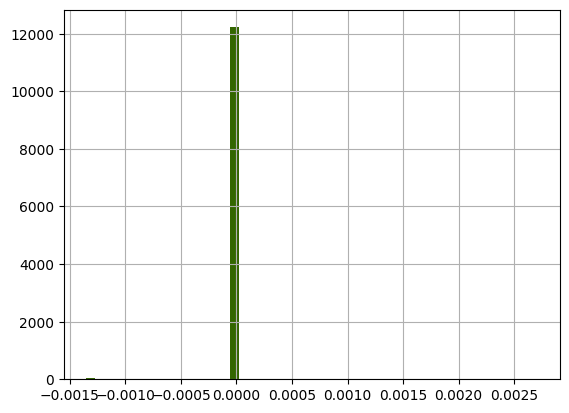

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['DS'].hist(bins = 50 , ax = ax , density = True , color = 'red')
new_df['DS'].hist(bins = 50 , ax = ax , density = True , color = 'green' , alpha = 0.8)

<Axes: >

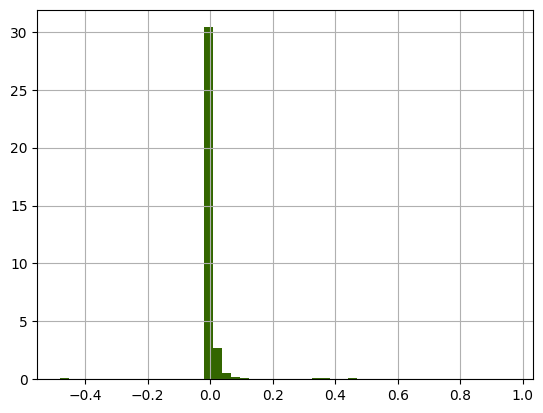

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['FM'].hist(bins = 50 , ax = ax , density = True , color = 'red')
new_df['FM'].hist(bins = 50 , ax = ax , density = True , color = 'green' , alpha = 0.8)

<Axes: >

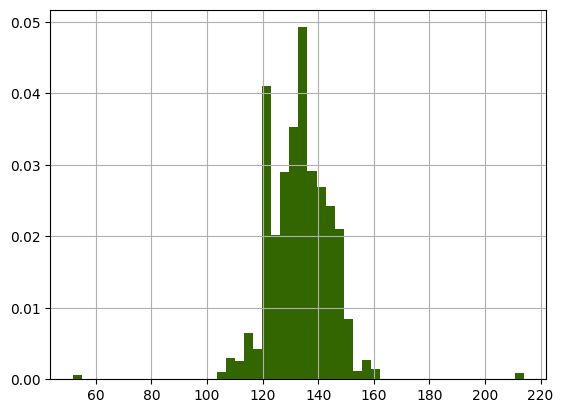

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['LB'].hist(bins = 50 , ax = ax , density = True , color = 'red')
new_df['LB'].hist(bins = 50 , ax = ax , density = True , color = 'green' , alpha = 0.8)

<Axes: >

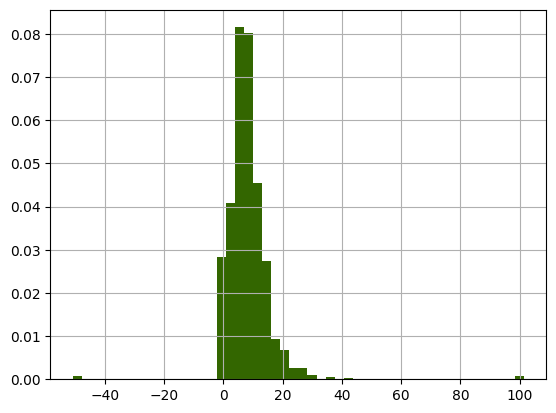

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['MLTV'].hist(bins = 50 , ax = ax , density = True , color = 'red')
new_df['MLTV'].hist(bins = 50 , ax = ax , density = True , color = 'green' , alpha = 0.8)

<Axes: >

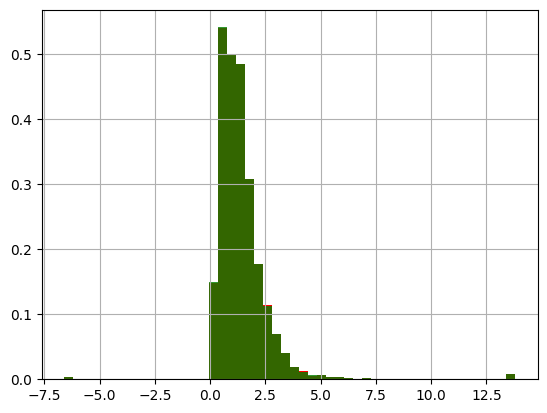

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['MSTV'].hist(bins = 50 , ax = ax , density = True , color = 'red')
new_df['MSTV'].hist(bins = 50 , ax = ax , density = True , color = 'green' , alpha = 0.8)

<Axes: >

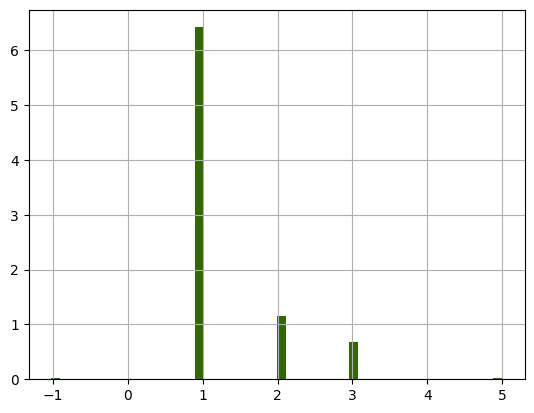

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['NSP'].hist(bins = 50 , ax = ax , density = True , color = 'red')
new_df['NSP'].hist(bins = 50 , ax = ax , density = True , color = 'green' , alpha = 0.8)

<Axes: >

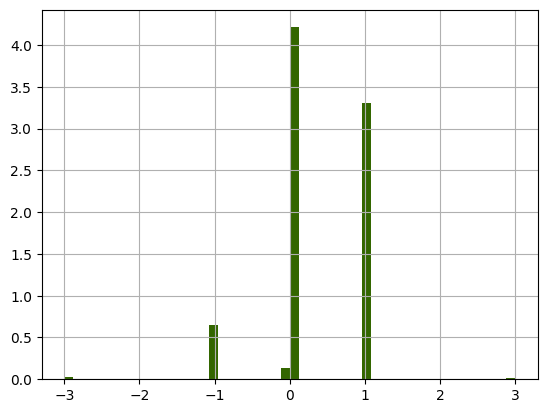

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['Tendency'].hist(bins = 50 , ax = ax , density = True , color = 'red')
new_df['Tendency'].hist(bins = 50 , ax = ax , density = True , color = 'green' , alpha = 0.8)

<Axes: >

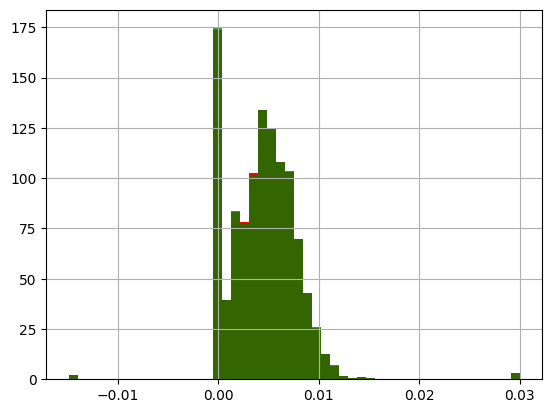

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['UC'].hist(bins = 50 , ax = ax , density = True , color = 'red')
new_df['UC'].hist(bins = 50 , ax = ax , density = True , color = 'green' , alpha = 0.8)

<Axes: >

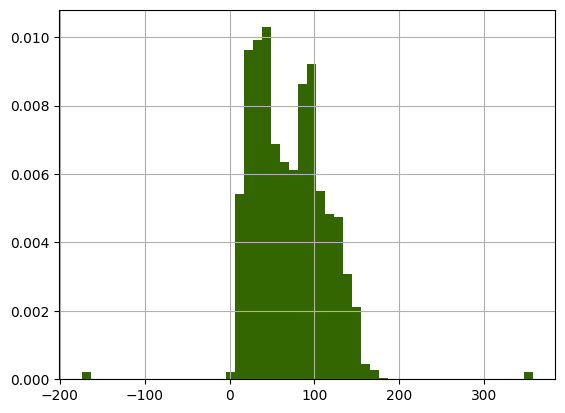

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['Width'].hist(bins = 50 , ax = ax , density = True , color = 'red')
new_df['Width'].hist(bins = 50 , ax = ax , density = True , color = 'green' , alpha = 0.8)

From the overlapping of  histograms u can notice  that the data distribution of the new dataset is almost same the data distribution of the old dataset.

<Axes: ylabel='Density'>

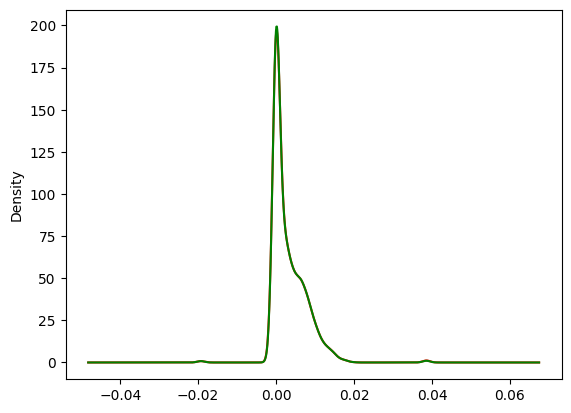

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['AC'].plot.density(color = 'red')
new_df['AC'].plot.density(color = 'green')

<Axes: ylabel='Density'>

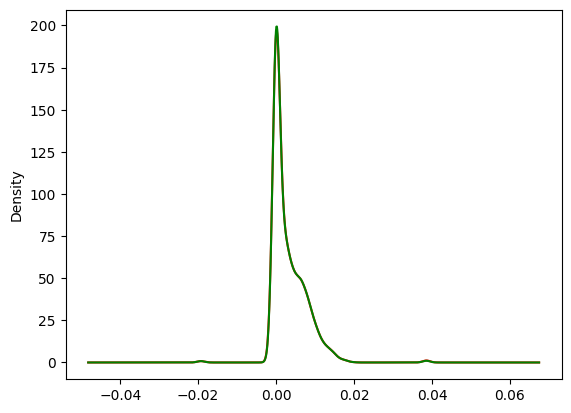

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['AC'].plot.density(color = 'red')
new_df['AC'].plot.density(color = 'green')

<Axes: ylabel='Density'>

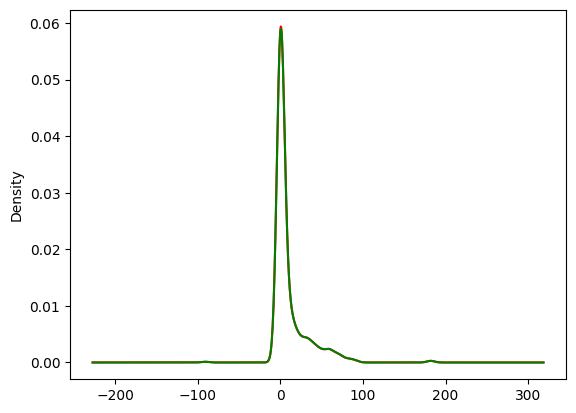

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['ALTV'].plot.density(color = 'red')
new_df['ALTV'].plot.density(color = 'green')

<Axes: ylabel='Density'>

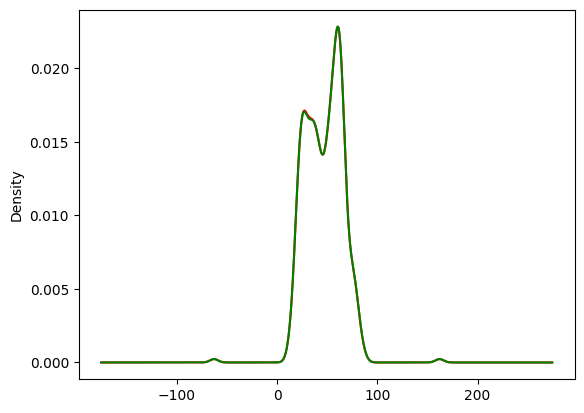

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['ASTV'].plot.density(color = 'red')
new_df['ASTV'].plot.density(color = 'green')

<Axes: ylabel='Density'>

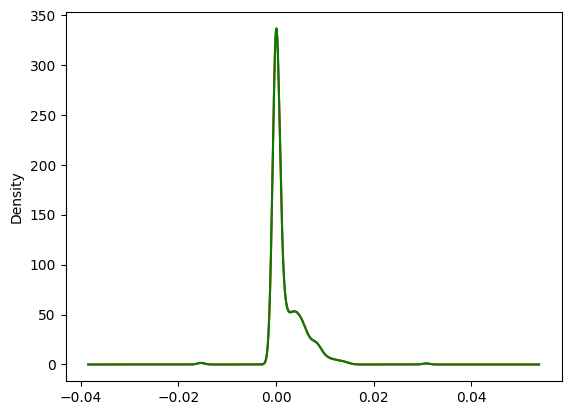

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['DL'].plot.density(color = 'red')
new_df['DL'].plot.density(color = 'green')

<Axes: ylabel='Density'>

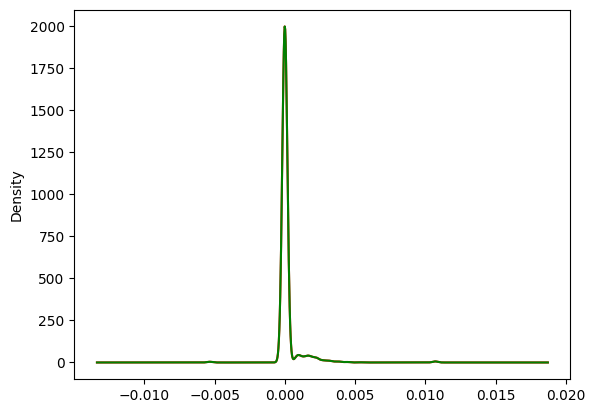

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['DP'].plot.density(color = 'red')
new_df['DP'].plot.density(color = 'green')

<Axes: ylabel='Density'>

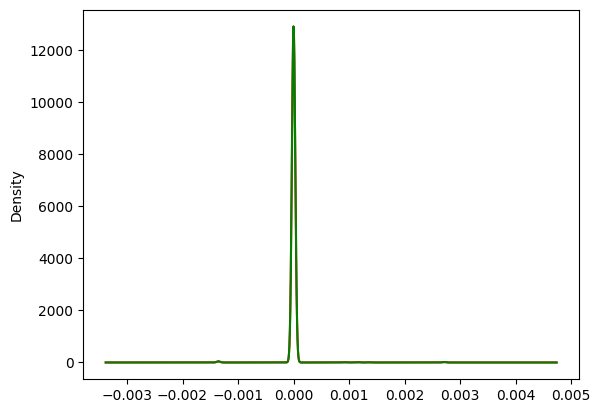

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['DS'].plot.density(color = 'red')
new_df['DS'].plot.density(color = 'green')

<Axes: ylabel='Density'>

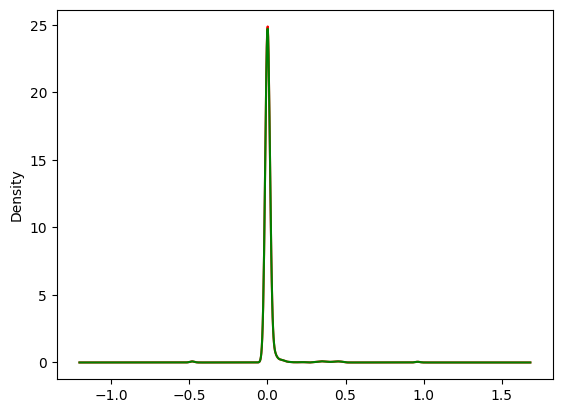

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['FM'].plot.density(color = 'red')
new_df['FM'].plot.density(color = 'green')

<Axes: ylabel='Density'>

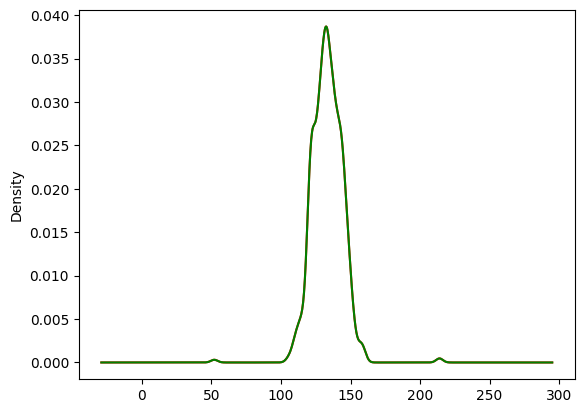

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['LB'].plot.density(color = 'red')
new_df['LB'].plot.density(color = 'green')

<Axes: ylabel='Density'>

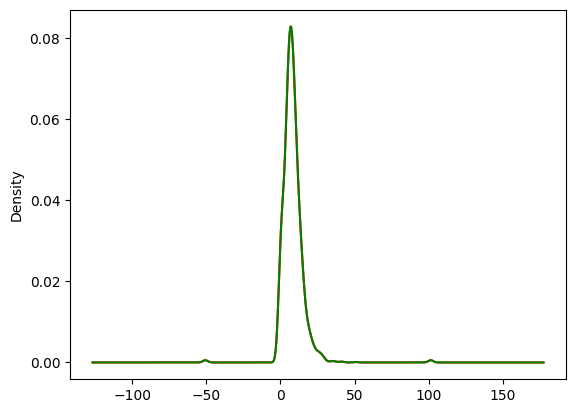

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['MLTV'].plot.density(color = 'red')
new_df['MLTV'].plot.density(color = 'green')

<Axes: ylabel='Density'>

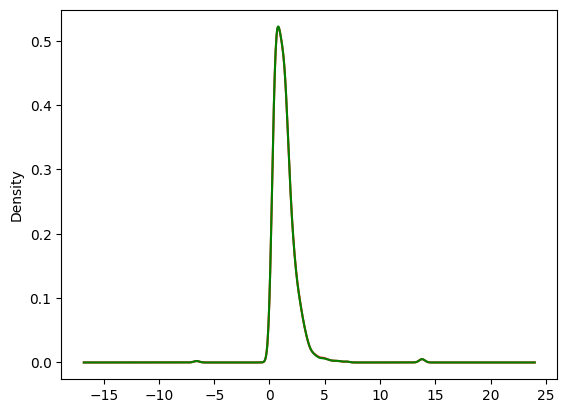

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['MSTV'].plot.density(color = 'red')
new_df['MSTV'].plot.density(color = 'green')

<Axes: ylabel='Density'>

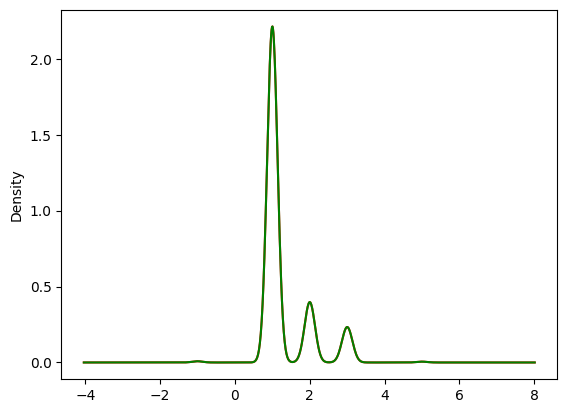

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['NSP'].plot.density(color = 'red')
new_df['NSP'].plot.density(color = 'green')

<Axes: ylabel='Density'>

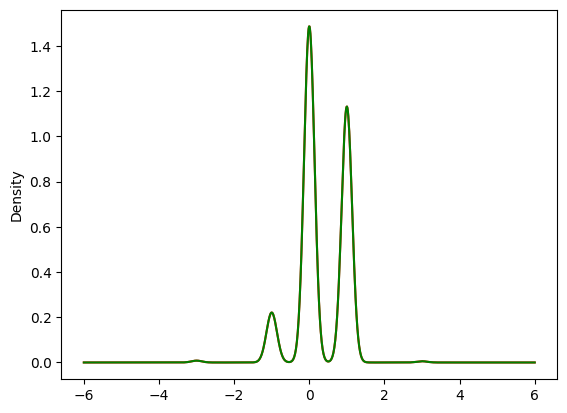

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['Tendency'].plot.density(color = 'red')
new_df['Tendency'].plot.density(color = 'green')

<Axes: ylabel='Density'>

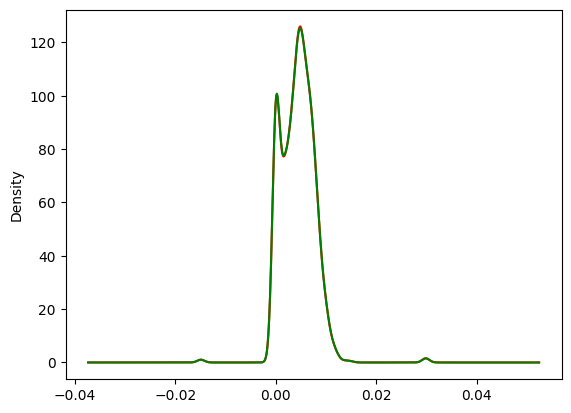

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['UC'].plot(kind = 'kde', ax = ax ,color = 'red')
new_df['UC'].plot( kind = 'kde', ax = ax ,color = 'green')

<Axes: ylabel='Density'>

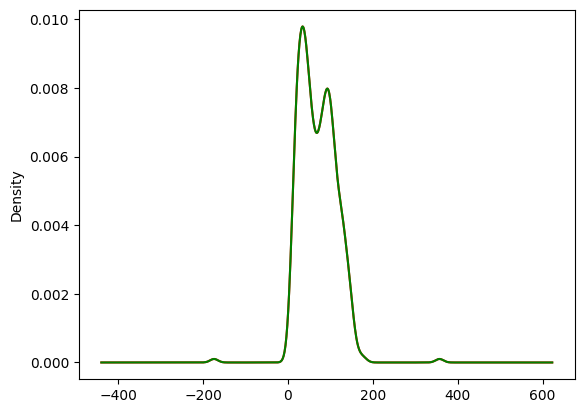

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['Width'].plot.density(color = 'red')
new_df['Width'].plot.density(color = 'green')

From the previous density plots u can notice that the data distribution shape of every column before removing missing values and after removing missing values are same. So we can keep the new dataset after dropping the missing value rows.

As our missing datas are handled , let's check for Outliers 

<Axes: >

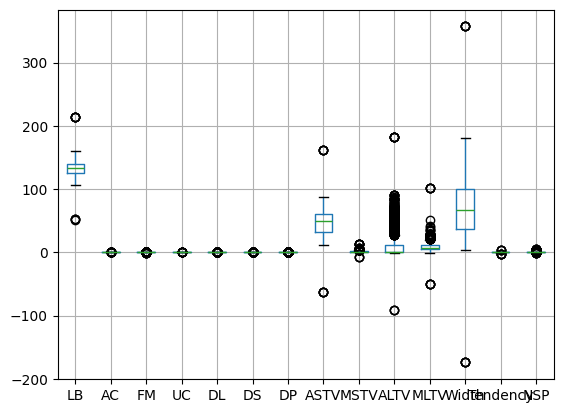

In [45]:
df[cols].boxplot()

<Axes: >

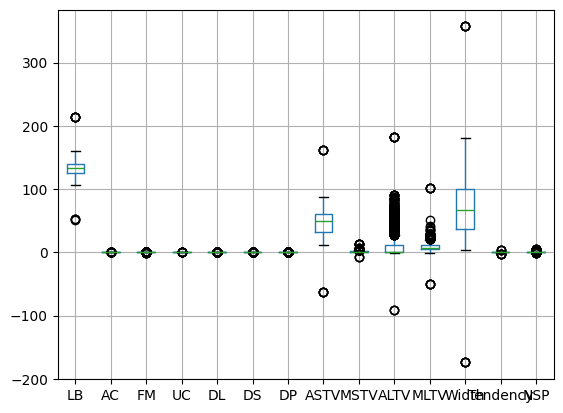

In [46]:
new_df[cols].boxplot()

Now u can see that there are no extra outliers created after removing the data 

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

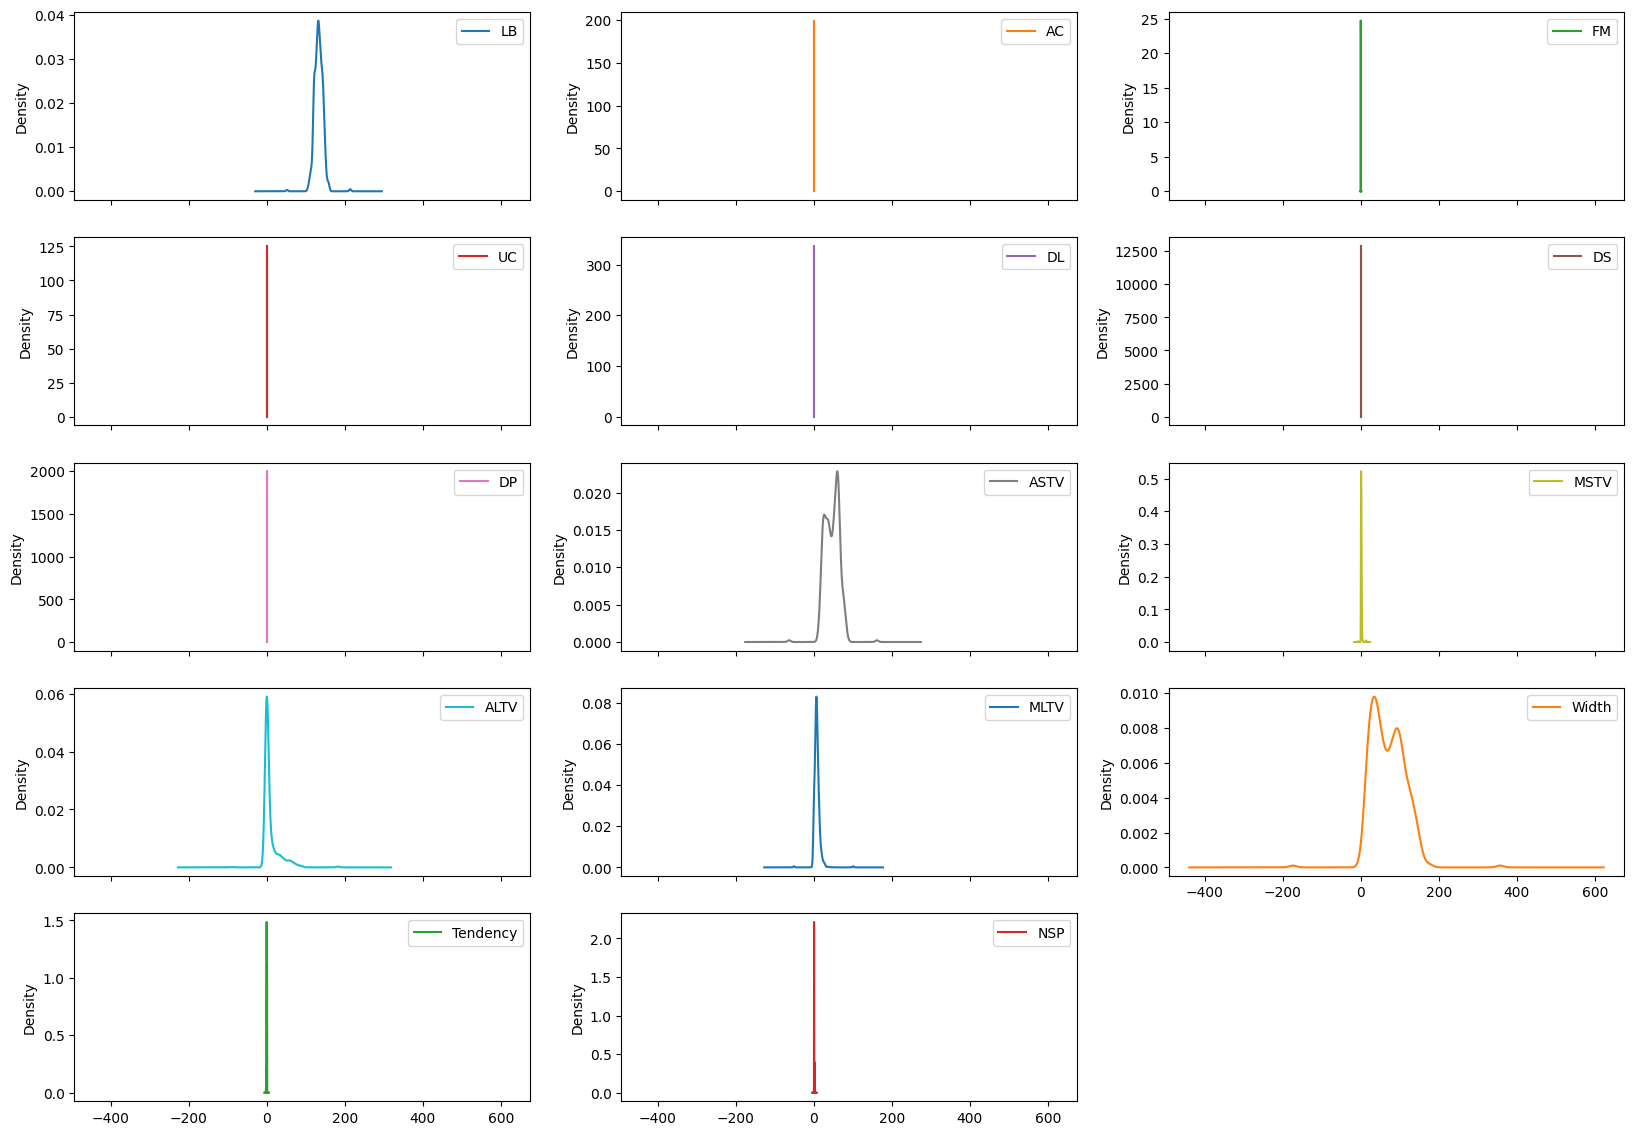

In [47]:
new_df.plot.density(subplots = True , layout = (7 , 3) , figsize = (20,20))

U can see here that some column distribution is similar to a line if it is plotted on a similiar plot. It is because the values are not in same format. In some cases the distribution is so wide that  the we can see the shape opf the distribution whereas on some cases the distribution is so narrow that we can not properly see the distribution of data of that column.It can be solved by using standardization.

### Standardization

Let's import the Standardization function which is 'StandardScaler' from Sci-kit-learn

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler() #storing standardscaler in a variable to use in future

In [50]:
scaler.fit(new_df) # fitting the standardization 
df_scaled = scaler.transform(new_df) #transforming the data as per the standardization

In [51]:
scaler.mean_ # mean of each column displayed in arrays

array([1.33343598e+02, 3.20218560e-03, 9.96337575e-03, 4.38754381e-03,
       1.89224763e-03, 2.50898351e-06, 1.75151212e-04, 4.69969290e+01,
       1.36100550e+00, 1.03536469e+01, 8.28488743e+00, 7.04292605e+01,
       3.16371404e-01, 1.30450718e+00])

In [52]:
df_scaled = pd.DataFrame(df_scaled , columns = new_df.columns) #storing the new scaled arrays( standardized values in a new data frame with the same column names

In [53]:
new_df.head(5)

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [54]:
df_scaled.head(5)

LB        AC        FM        UC        DL        DS       DP  \
0 -1.184258 -0.740798 -0.146835 -1.310156 -0.565300 -0.017731 -0.20862   
1 -0.119246  0.735064 -0.146835  0.594840  0.387636 -0.017731 -0.20862   
2 -0.030495  0.027778 -0.146835  1.169977  0.427209 -0.017731 -0.20862   
3  0.058256 -0.148375 -0.146835  1.001632  0.199733 -0.017731 -0.20862   
4 -0.123840  0.766312 -0.146835  1.121506 -0.565300 -0.017731 -0.20862   

       ASTV      MSTV      ALTV      MLTV     Width  Tendency       NSP  
0  1.379967 -0.734092  1.534346 -0.757287 -0.149791  1.059005  1.079177  
1 -1.591918  0.630065 -0.486611  0.272180  1.387896 -0.490142 -0.472495  
2 -1.644988  0.630065 -0.486611  0.658230  1.387896 -0.490142 -0.472495  
3 -1.644988  0.885845 -0.486611  1.893590  1.085018  1.059120 -0.472495  
4 -1.644988  0.885845 -0.486611  1.494672  1.085018  1.059120 -0.472495

In [55]:
np.round(df_scaled.describe() , 3) #checking for scaled values.
# if the man and the standard deviation are 0 and 1 respectively after standardization then the scaling is correct.

LB        AC        FM        UC        DL        DS        DP  \
count  2105.000  2105.000  2105.000  2105.000  2105.000  2105.000  2105.000   
mean      0.000     0.000     0.000    -0.000     0.000    -0.000     0.000   
std       1.000     1.000     1.000     1.000     1.000     1.000     1.000   
min      -7.233    -5.202    -7.230    -5.767    -5.164    -9.581    -6.578   
25%      -0.652    -0.741    -0.147    -0.761    -0.565    -0.018    -0.209   
50%      -0.030    -0.363    -0.147     0.029    -0.565    -0.018    -0.209   
75%       0.591     0.566    -0.109     0.642     0.417    -0.018    -0.209   
max       7.158     8.181    14.020     7.649     8.627    19.108    12.530   

           ASTV      MSTV      ALTV      MLTV     Width  Tendency       NSP  
count  2105.000  2105.000  2105.000  2105.000  2105.000  2105.000  2105.000  
mean     -0.000     0.000     0.000    -0.000    -0.000     0.000     0.000  
std       1.000     1.000     1.000     1.000     1.000     1.000     1.000  
min      -5.837    -6.788    -4.764    -7.590    -5.695    -5.138    -3.616  
25%      -0.796    -0.564    -0.487    -0.474    -0.779    -0.490    -0.472  
50%       0.106    -0.137    -0.487    -0.114    -0.080    -0.490    -0.472  
75%       0.743     0.289     0.030     0.337     0.689     1.059    -0.472  
max       6.103    10.605     8.067    11.982     6.677     4.158     5.734

Let's compare the data distribution shape of the dataset before an the dataset after scaling

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

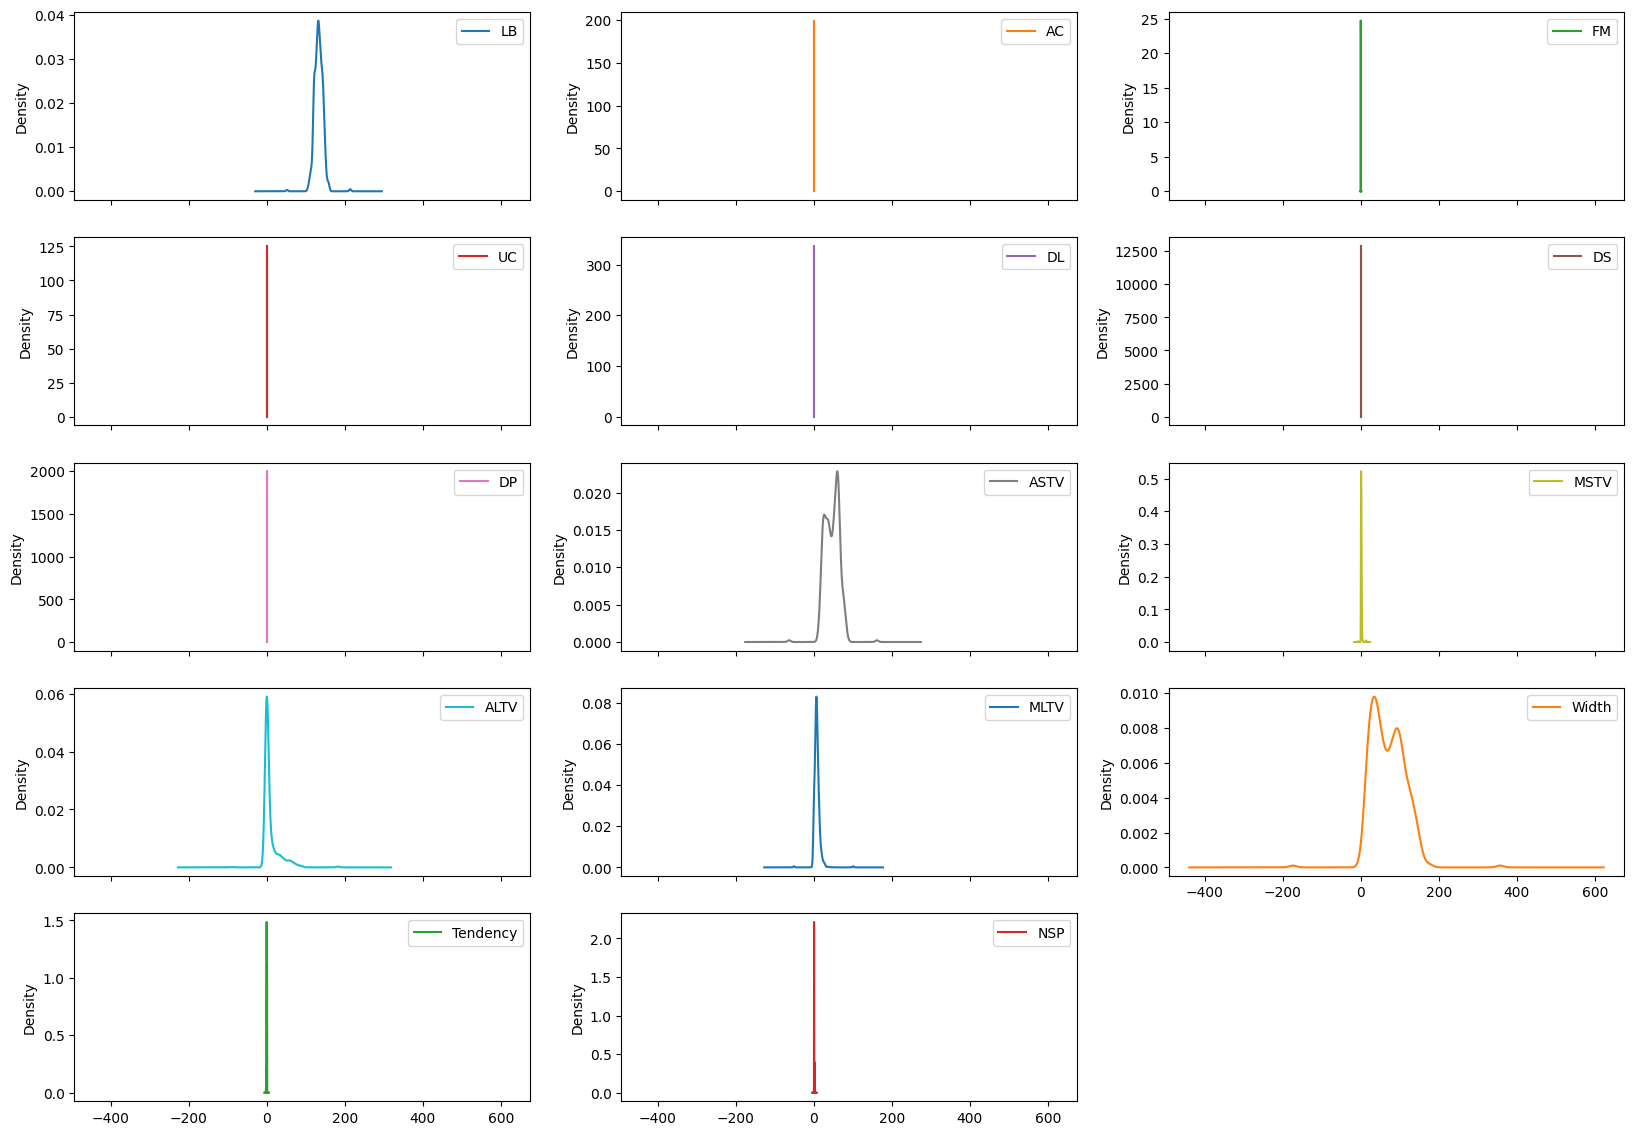

In [56]:
new_df.plot.density(subplots = True , layout = (7 , 3) , figsize = (20,20)) 

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

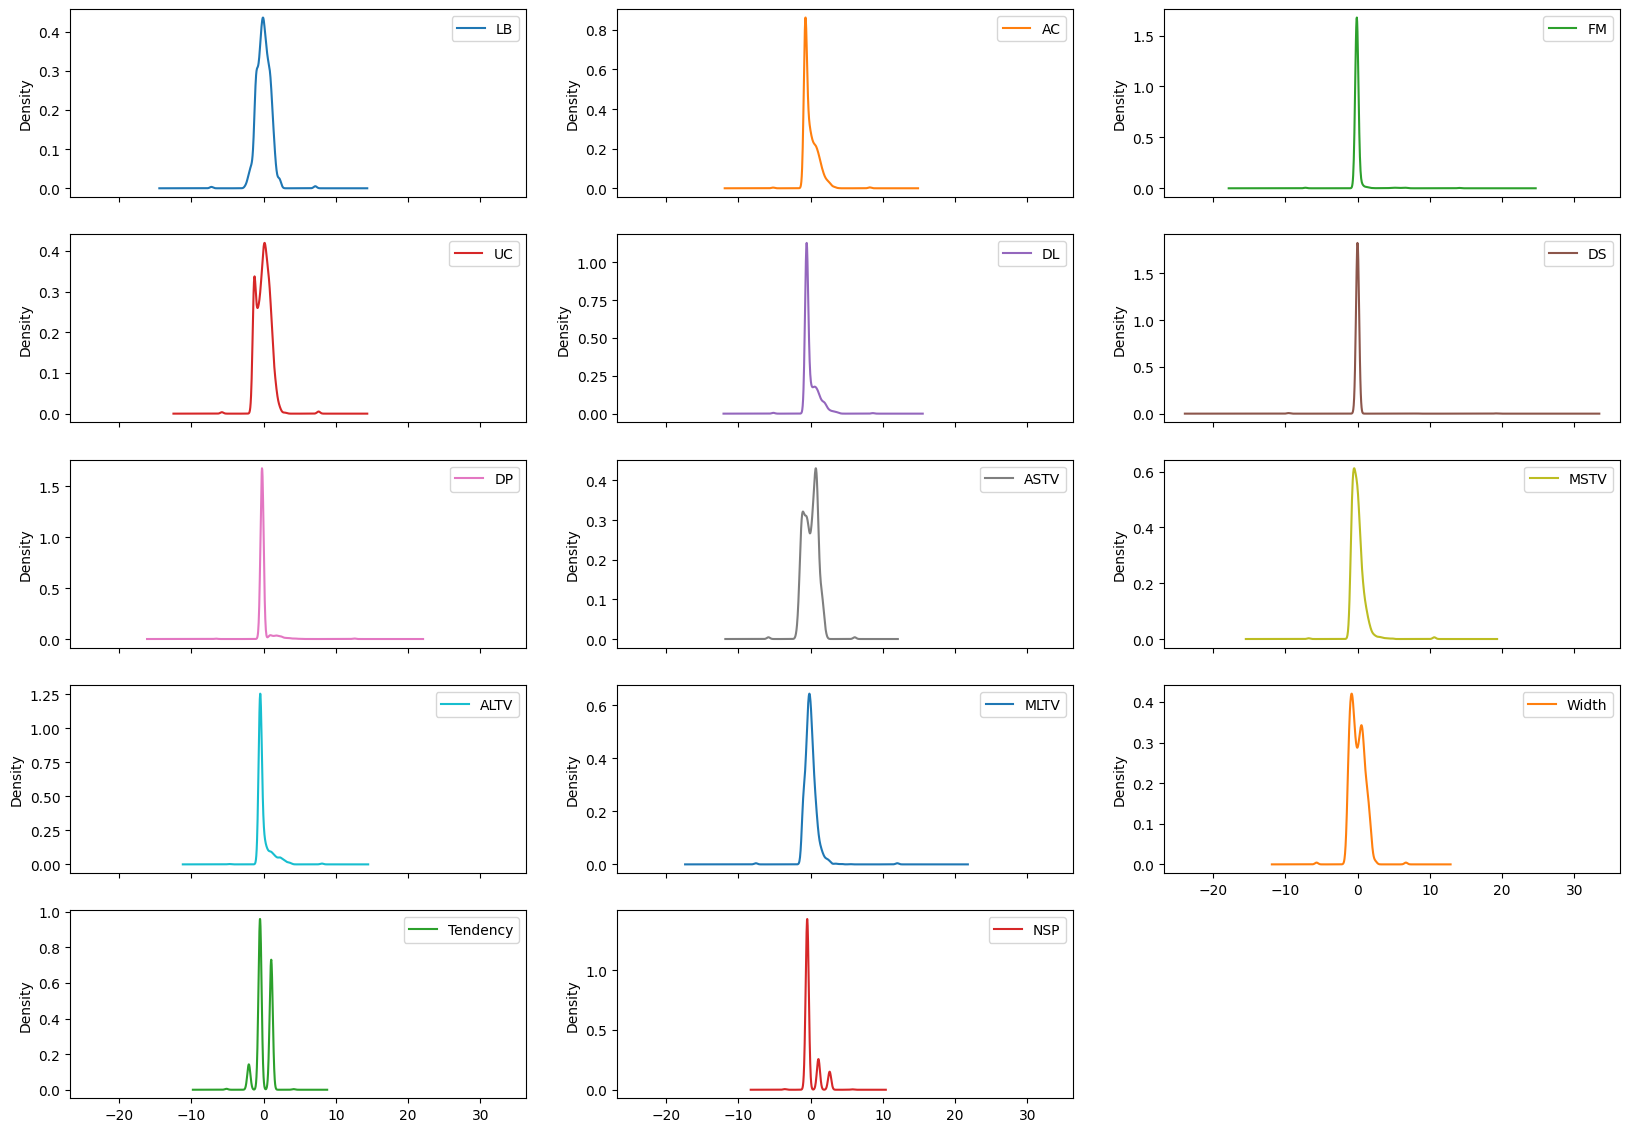

In [57]:
df_scaled.plot.density(subplots = True , layout = (7 , 3) , figsize = (20,20))

U can see the shape of the distribution of the data for the columns which were not clearly visible (shrinked) is now  wider and clearly visible. It is possible because of standardization where we used z-score normalization to scale every column's data into a single format

Let's plot boxplot for both the dataframes 

<Axes: >

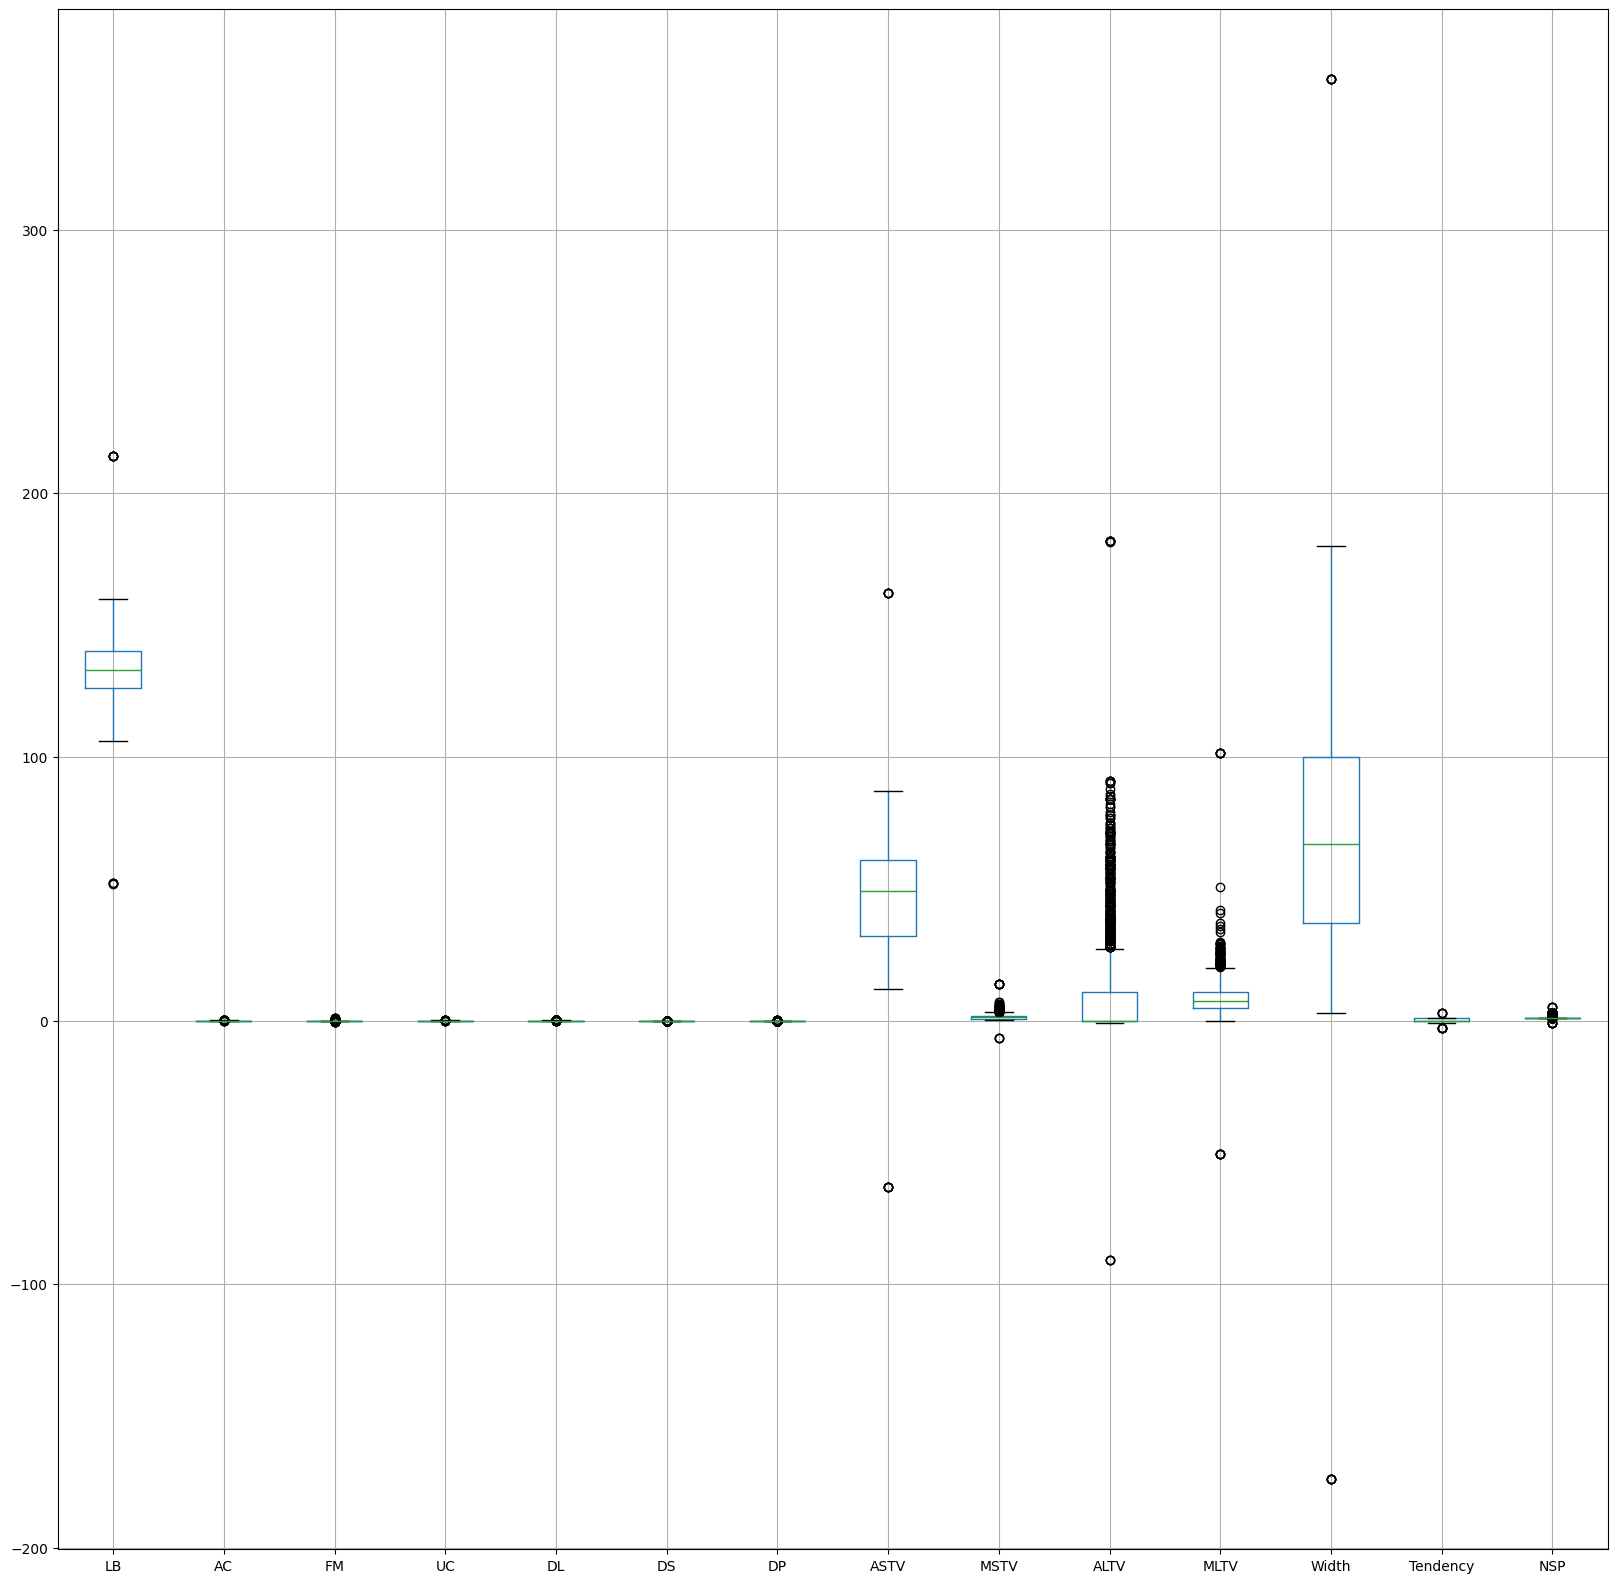

In [58]:
df.boxplot(figsize = (20 , 20))

<Axes: >

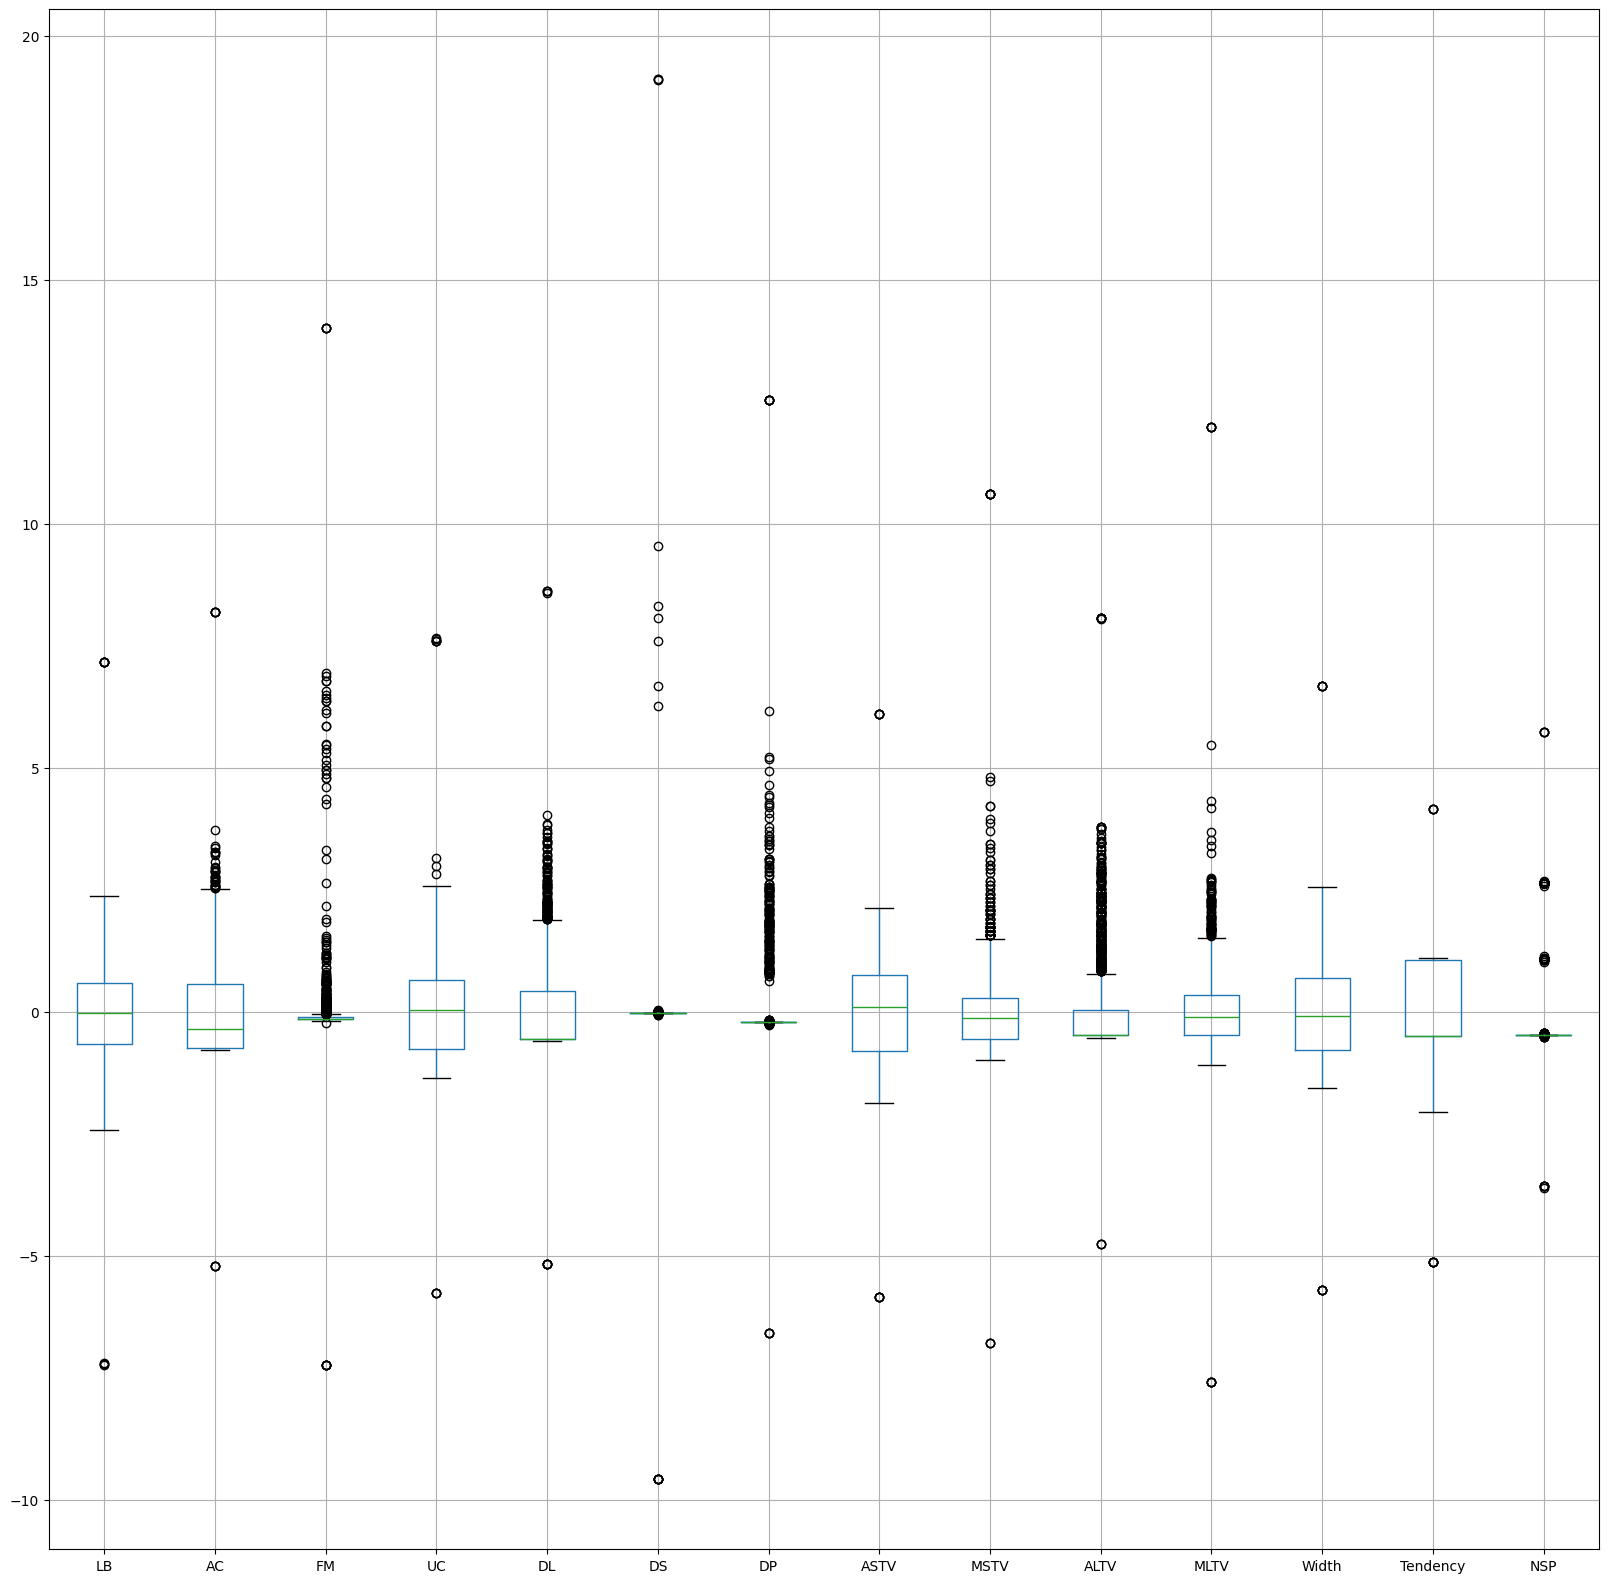

In [59]:
df_scaled.boxplot(figsize=(20,20))

U can see that boxplot is more informative

But u can notice that there are outiers in our data by observing the boxplot. Let's handle them.

### Outliers handling

In [60]:
df_scaled.skew() #checking skewness of each column to see if the datas are normally distributted or skewed for each column

LB          0.320747
AC          1.864886
FM          6.718356
UC          0.977332
DL          2.011970
DS          8.418984
DP          6.422466
ASTV        0.055370
MSTV        4.175994
ALTV        2.968950
MLTV        3.541448
Width       0.495246
Tendency   -0.496789
NSP         1.810900
dtype: float64

U can see here that  ASTV is the only column which is close to normal distribution

let's handle it's outlier.

### ASTV column's outlier handling.

As the data is normally distributted we can handle outliers by using the Z-score method.

<Axes: ylabel='ASTV'>

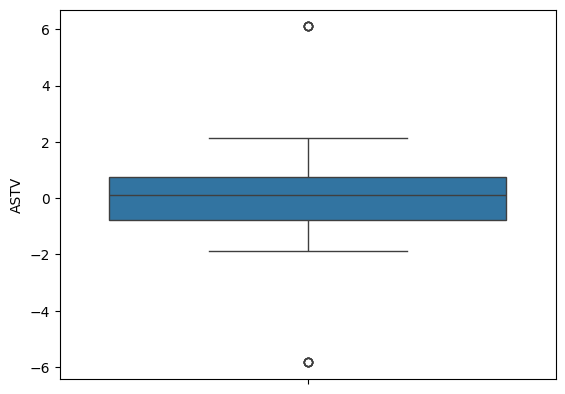

In [61]:
sns.boxplot(data = df_scaled['ASTV']) # It has very few outliers

Skewness  0.05536993063749139


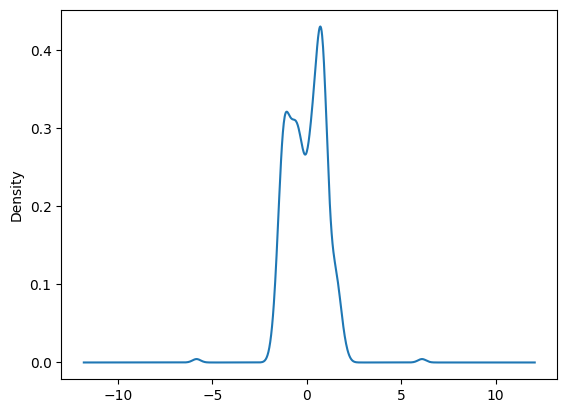

In [62]:
df_scaled['ASTV'].plot.density()
print("Skewness " , df_scaled['ASTV'].skew()) #shape of the data

#### Z score transformation

In [63]:
print("Mean is" , df_scaled['ASTV'].mean())
print("Standard deviation is" , df_scaled['ASTV'].std())
print("Minimum value is" , df_scaled['ASTV'].min())
print("Maximum value is" , df_scaled['ASTV'].max())

Mean is -1.4177099715878482e-16
Standard deviation is 1.0002376143552603
Minimum value is -5.8374682583986885
Maximum value is 6.1031410827124875


In [64]:
Highest_Allowed = (df_scaled['ASTV'].mean()) + (3 * df_scaled['ASTV'].std()) #Highest boundary of the data

In [65]:
print(Highest_Allowed)

3.000712843065781


In [66]:
Lowest_Allowed = (df_scaled['ASTV'].mean()) - (3 * df_scaled['ASTV'].std()) #lowest boundary of the data

In [67]:
print(Lowest_Allowed)

-3.000712843065781


In [68]:
df_scaled[(df_scaled['ASTV'] > Highest_Allowed) | (df_scaled['ASTV'] < Lowest_Allowed)] #let's display the outliers

LB        AC        FM        UC        DL        DS       DP  \
128   2.188281 -0.740798 -0.146835 -1.310156 -0.565300 -0.017731 -0.20862   
228  -0.918005  0.103514 -0.066156 -1.310156 -0.565300 -0.017731 -0.20862   
341   0.502011 -0.742418 -0.049665 -1.310156 -0.565300 -0.017731 -0.20862   
500  -0.474250  1.168485  0.055881 -0.077936 -0.565300 -0.017731 -0.20862   
1004  0.502011  0.719427 -0.146835  0.036138 -0.565300 -0.017731 -0.20862   
1017 -7.233306  1.453497 -0.146835  0.308316  0.244308  0.014477 -0.20862   
1185  0.413260  1.977958 -0.146835  0.284972 -0.565300 -0.017731 -0.20862   
1564 -0.119246 -0.740798 -0.189406 -0.416120 -0.543051 -0.017731 -0.20862   
1920 -0.030495 -0.740798 -0.094342  0.551159  0.498797 -0.017731 -0.20862   
1987 -0.740503 -0.464074 -0.129207  1.190151  2.293507 -0.017731 -0.20862   

          ASTV      MSTV      ALTV      MLTV     Width  Tendency       NSP  
128  -5.837468 -0.648832  0.970358  0.040550  0.502561  1.059120 -0.472495  
228   6.103141 -0.563572 -0.486611  0.040550  0.013297  1.059120 -0.498222  
341   6.103141 -0.989871  2.286330 -0.525657 -1.384600 -0.490142  1.079177  
500  -5.837468 -0.222533 -0.486611  0.568152  1.224808 -0.490142 -0.472495  
1004  6.103141 -0.478312 -0.486611 -0.088134 -0.850751 -2.039405 -0.472495  
1017 -5.837468  0.971104 -0.486611 -0.564262  0.642351 -0.490142 -0.472495  
1185 -5.837468 -0.137273 -0.486611 -0.538525 -0.522563 -0.490142 -0.472495  
1564 -5.837468 -0.222533 -0.486611  0.696835 -0.429370  1.059120 -0.472495  
1920  6.103141  0.630065 -0.486611 -0.869628  0.642351 -0.490142 -0.472495  
1987  6.103141 -0.222533 -0.486611 -0.538525  0.688947 -0.490142 -0.472495

In [69]:
df_scaled[(df_scaled['ASTV'] > Highest_Allowed) | (df_scaled['ASTV'] < Lowest_Allowed)] #number of outliers

LB        AC        FM        UC        DL        DS       DP  \
128   2.188281 -0.740798 -0.146835 -1.310156 -0.565300 -0.017731 -0.20862   
228  -0.918005  0.103514 -0.066156 -1.310156 -0.565300 -0.017731 -0.20862   
341   0.502011 -0.742418 -0.049665 -1.310156 -0.565300 -0.017731 -0.20862   
500  -0.474250  1.168485  0.055881 -0.077936 -0.565300 -0.017731 -0.20862   
1004  0.502011  0.719427 -0.146835  0.036138 -0.565300 -0.017731 -0.20862   
1017 -7.233306  1.453497 -0.146835  0.308316  0.244308  0.014477 -0.20862   
1185  0.413260  1.977958 -0.146835  0.284972 -0.565300 -0.017731 -0.20862   
1564 -0.119246 -0.740798 -0.189406 -0.416120 -0.543051 -0.017731 -0.20862   
1920 -0.030495 -0.740798 -0.094342  0.551159  0.498797 -0.017731 -0.20862   
1987 -0.740503 -0.464074 -0.129207  1.190151  2.293507 -0.017731 -0.20862   

          ASTV      MSTV      ALTV      MLTV     Width  Tendency       NSP  
128  -5.837468 -0.648832  0.970358  0.040550  0.502561  1.059120 -0.472495  
228   6.103141 -0.563572 -0.486611  0.040550  0.013297  1.059120 -0.498222  
341   6.103141 -0.989871  2.286330 -0.525657 -1.384600 -0.490142  1.079177  
500  -5.837468 -0.222533 -0.486611  0.568152  1.224808 -0.490142 -0.472495  
1004  6.103141 -0.478312 -0.486611 -0.088134 -0.850751 -2.039405 -0.472495  
1017 -5.837468  0.971104 -0.486611 -0.564262  0.642351 -0.490142 -0.472495  
1185 -5.837468 -0.137273 -0.486611 -0.538525 -0.522563 -0.490142 -0.472495  
1564 -5.837468 -0.222533 -0.486611  0.696835 -0.429370  1.059120 -0.472495  
1920  6.103141  0.630065 -0.486611 -0.869628  0.642351 -0.490142 -0.472495  
1987  6.103141 -0.222533 -0.486611 -0.538525  0.688947 -0.490142 -0.472495

In [70]:
df_scaled.shape #Dimension of the dataset before removing outliers from ASTV column

(2105, 14)

In [71]:
new_df_scaled = df_scaled[(df_scaled['ASTV'] < Highest_Allowed) & (df_scaled['ASTV'] > Lowest_Allowed)] #creating a new dataset by storing the datas without outliers

In [72]:
new_df_scaled.shape #Dimension of the dataset after removing outliers from ASTV column

(2095, 14)

<Axes: ylabel='ASTV'>

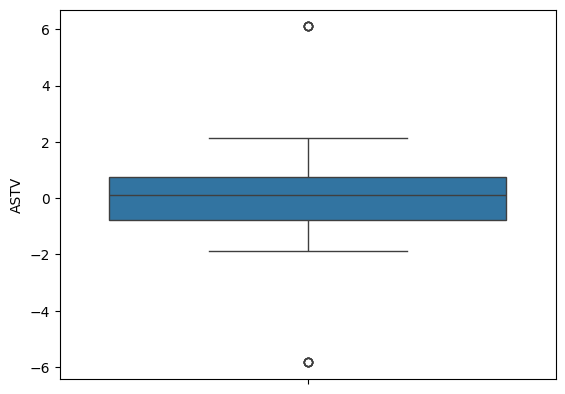

In [73]:
sns.boxplot(data = df_scaled['ASTV']) #boxplot before removing ASTV outliers

<Axes: ylabel='ASTV'>

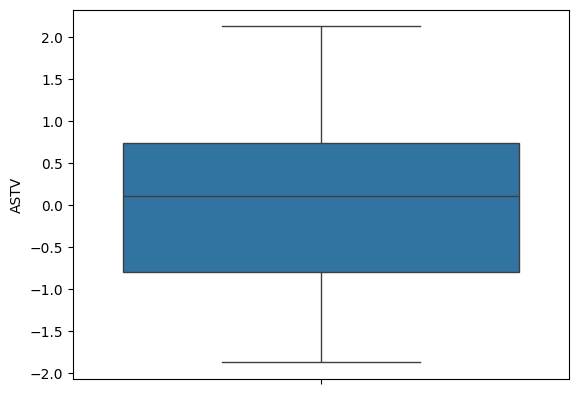

In [74]:
sns.boxplot(data = new_df_scaled['ASTV']) #boxplot after removing ASTV outliers

<Axes: ylabel='Density'>

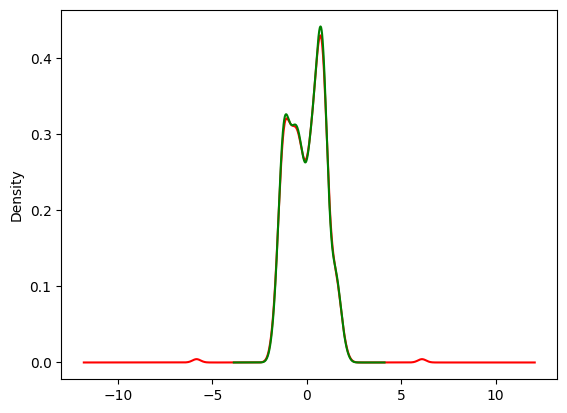

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_scaled['ASTV'].plot.density(color = 'red')
new_df_scaled['ASTV'].plot.density(color = 'green')

#checking if the data distribution is changed after removing outliers

Outliers in ASTV columns are handled.

<Axes: >

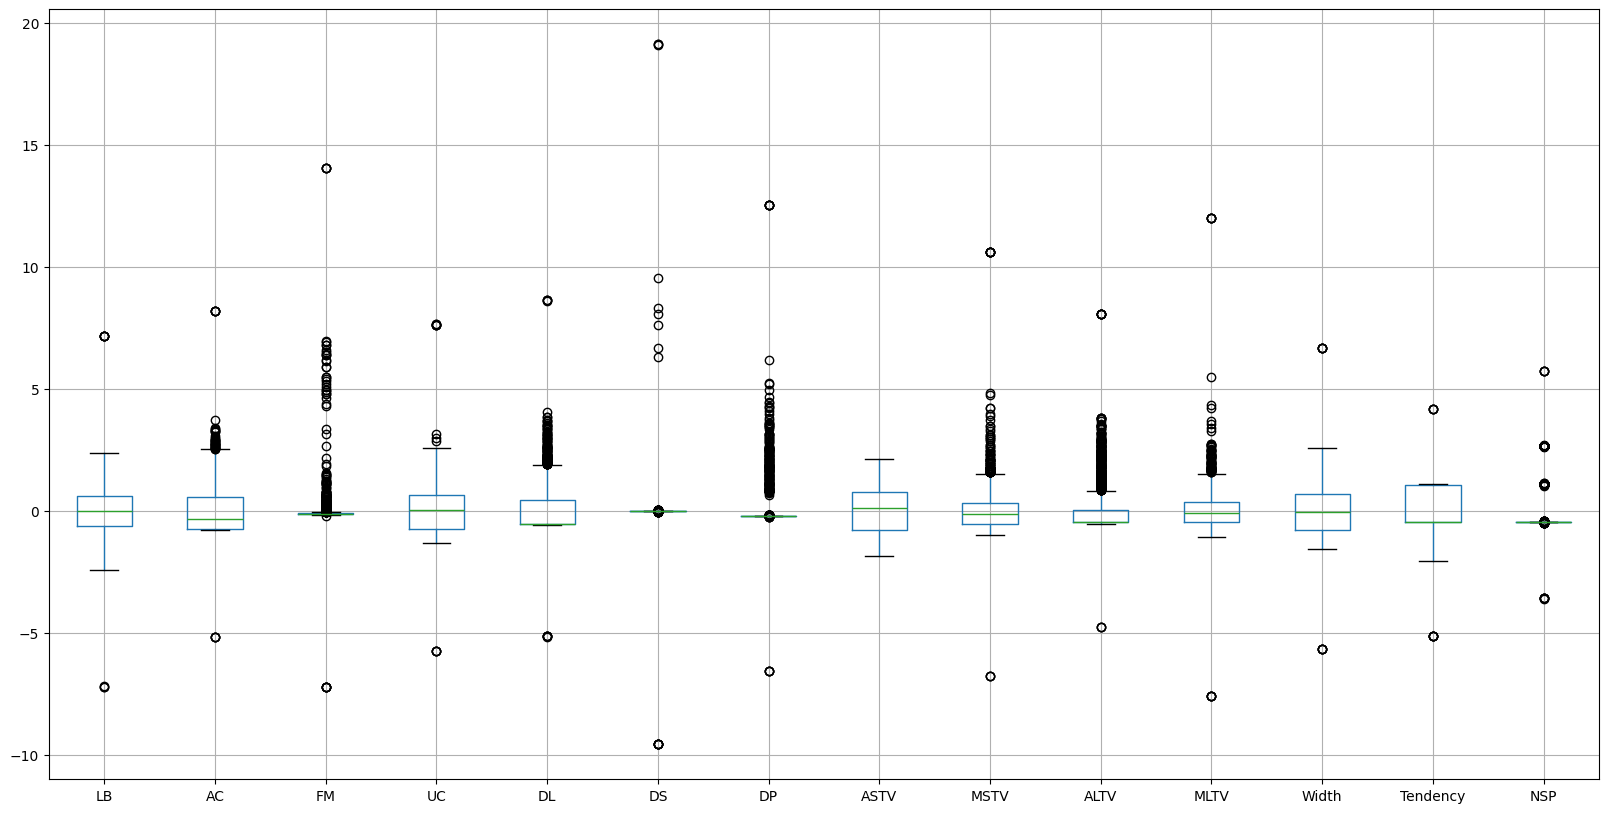

In [76]:
new_df_scaled.boxplot(figsize = (20,10))

From the abive boxplot all of the columns except ASTV are skewed . So we r gonna handle outliers in those columns by using IQR method.But there are some columns where removing the outliers will be bad for our dataset and there are some columns from which we can remove outliers . So let's handle the outliers by performing Trimming and Capping.

Trimming will be performed where the number of outliers is very less and Capping will be performed where the number of outliers are very high.

Let's separate the columns that we will use trimming on and the columns that we will use capping on.

But another problem is that  FM , DS , DP , NSP 's boxplot are not clearly visible. Let's handle outliers in them after we handle outliers on the clearly visible boxplots.

As we have already handle the ASTV column's let's go with other columns

The columns that we r gonna perform IQR on are LB , AC , UC , DL , MSTV , ALTV , MLTV , Width , Tendency

In [77]:
def IQR_OUTLIERS(X): #creating a fucntion to perform IQR outlier removing method.
    for i in X.columns:
        percentile75 = X[i].quantile(0.75)
        percentile25 = X[i].quantile(0.25)
        IQR = percentile75 - percentile25
        UL = percentile75 + 1.5*IQR
        LL = percentile25 - 1.5*IQR
        if len(X[(X[i] < LL) | (X[i] > UL)]) < 20:
            X = X[(X[i] <UL) & (X[i] > LL)]
        else:
            X.loc[X[i] < LL, i] = LL
            X.loc[X[i] > UL, i] = UL
    return X

In [78]:
X = new_df_scaled.drop(['ASTV' , 'FM' , 'DS' , 'DP' , 'NSP'] , axis = 1) # storing 'ASTV' , 'FM' , 'DS' , 'DP' , 'NSP' columns to a new dataframe to perform IQR on it separately

In [79]:
X.shape

(2095, 9)

In [80]:
X = IQR_OUTLIERS(X) #applied function on the new dataframe

C:\Users\achar\AppData\Local\Temp\ipykernel_32976\1937972201.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[i] < LL, i] = LL
C:\Users\achar\AppData\Local\Temp\ipykernel_32976\1937972201.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[i] > UL, i] = UL


<Axes: >

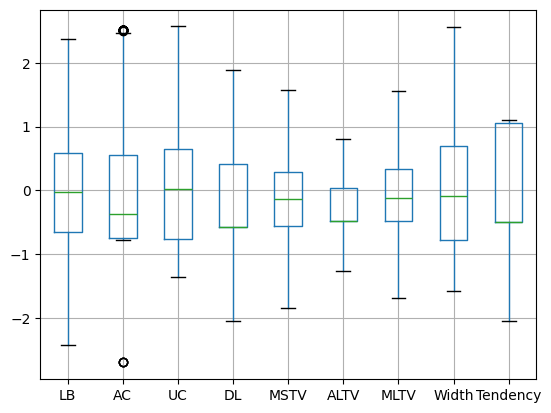

In [81]:
X.boxplot() #boxplot to confirm all ouliers are removed

2.5015255139836556 -2.6861923402266816


<Axes: >

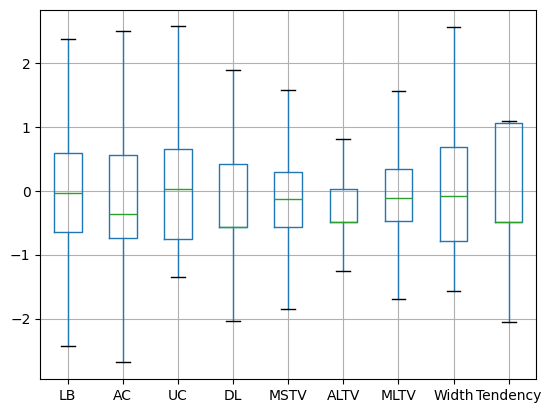

In [82]:
#again separately performing IQR method on 'AC' column to remove the remaining outliers
percentile75 = X['AC'].quantile(0.75)
percentile25 = X['AC'].quantile(0.25)
IQR = percentile75 - percentile25
UL = percentile75 + 1.5*IQR
LL = percentile25 - 1.5*IQR
print(UL , LL)
X[(X['AC'] < LL) | (X["AC"] > UL)]
X.loc[X['AC'] < LL, 'AC'] = LL
X.loc[X['AC'] > UL, 'AC'] = UL
X.boxplot() #checking for outliers again

As u can see there are no outliers remaining . Now let's remove the ouliers from the FM , DS , DP , NSP  column

In [83]:
Y = new_df_scaled.drop(columns=['LB' , 'AC' , 'UC' , 'DL' , 'MSTV' , 'ALTV' , 'MLTV' , 'Width' , 'Tendency' , 'ASTV'] , axis = 1) #storing the other columns in the new variable to handle outliers in them.

<Axes: >

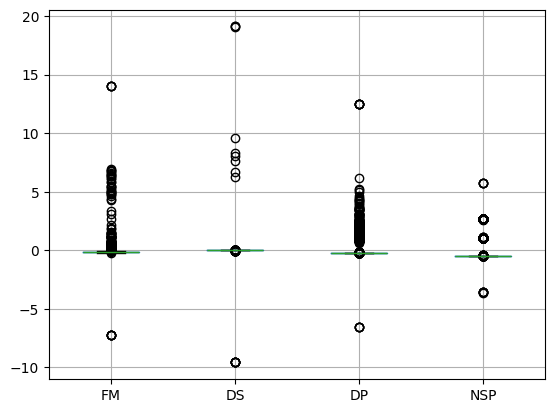

In [84]:
Y.boxplot() #data when there were outliers

In [85]:
Y = IQR_OUTLIERS(Y) #same fucntion

<Axes: >

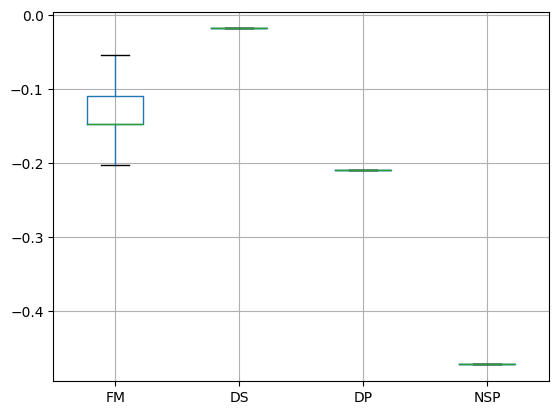

In [86]:
Y.boxplot() #data when the outliers are handled

As u can see the outliers are handled

In [95]:
final_df = pd.concat([X , Y] , axis = 1) #merging the ouleirs free dataframes and making them one
final_df['ASTV'] = new_df_scaled['ASTV']

In [96]:
final_df.shape

(2095, 14)

<Axes: >

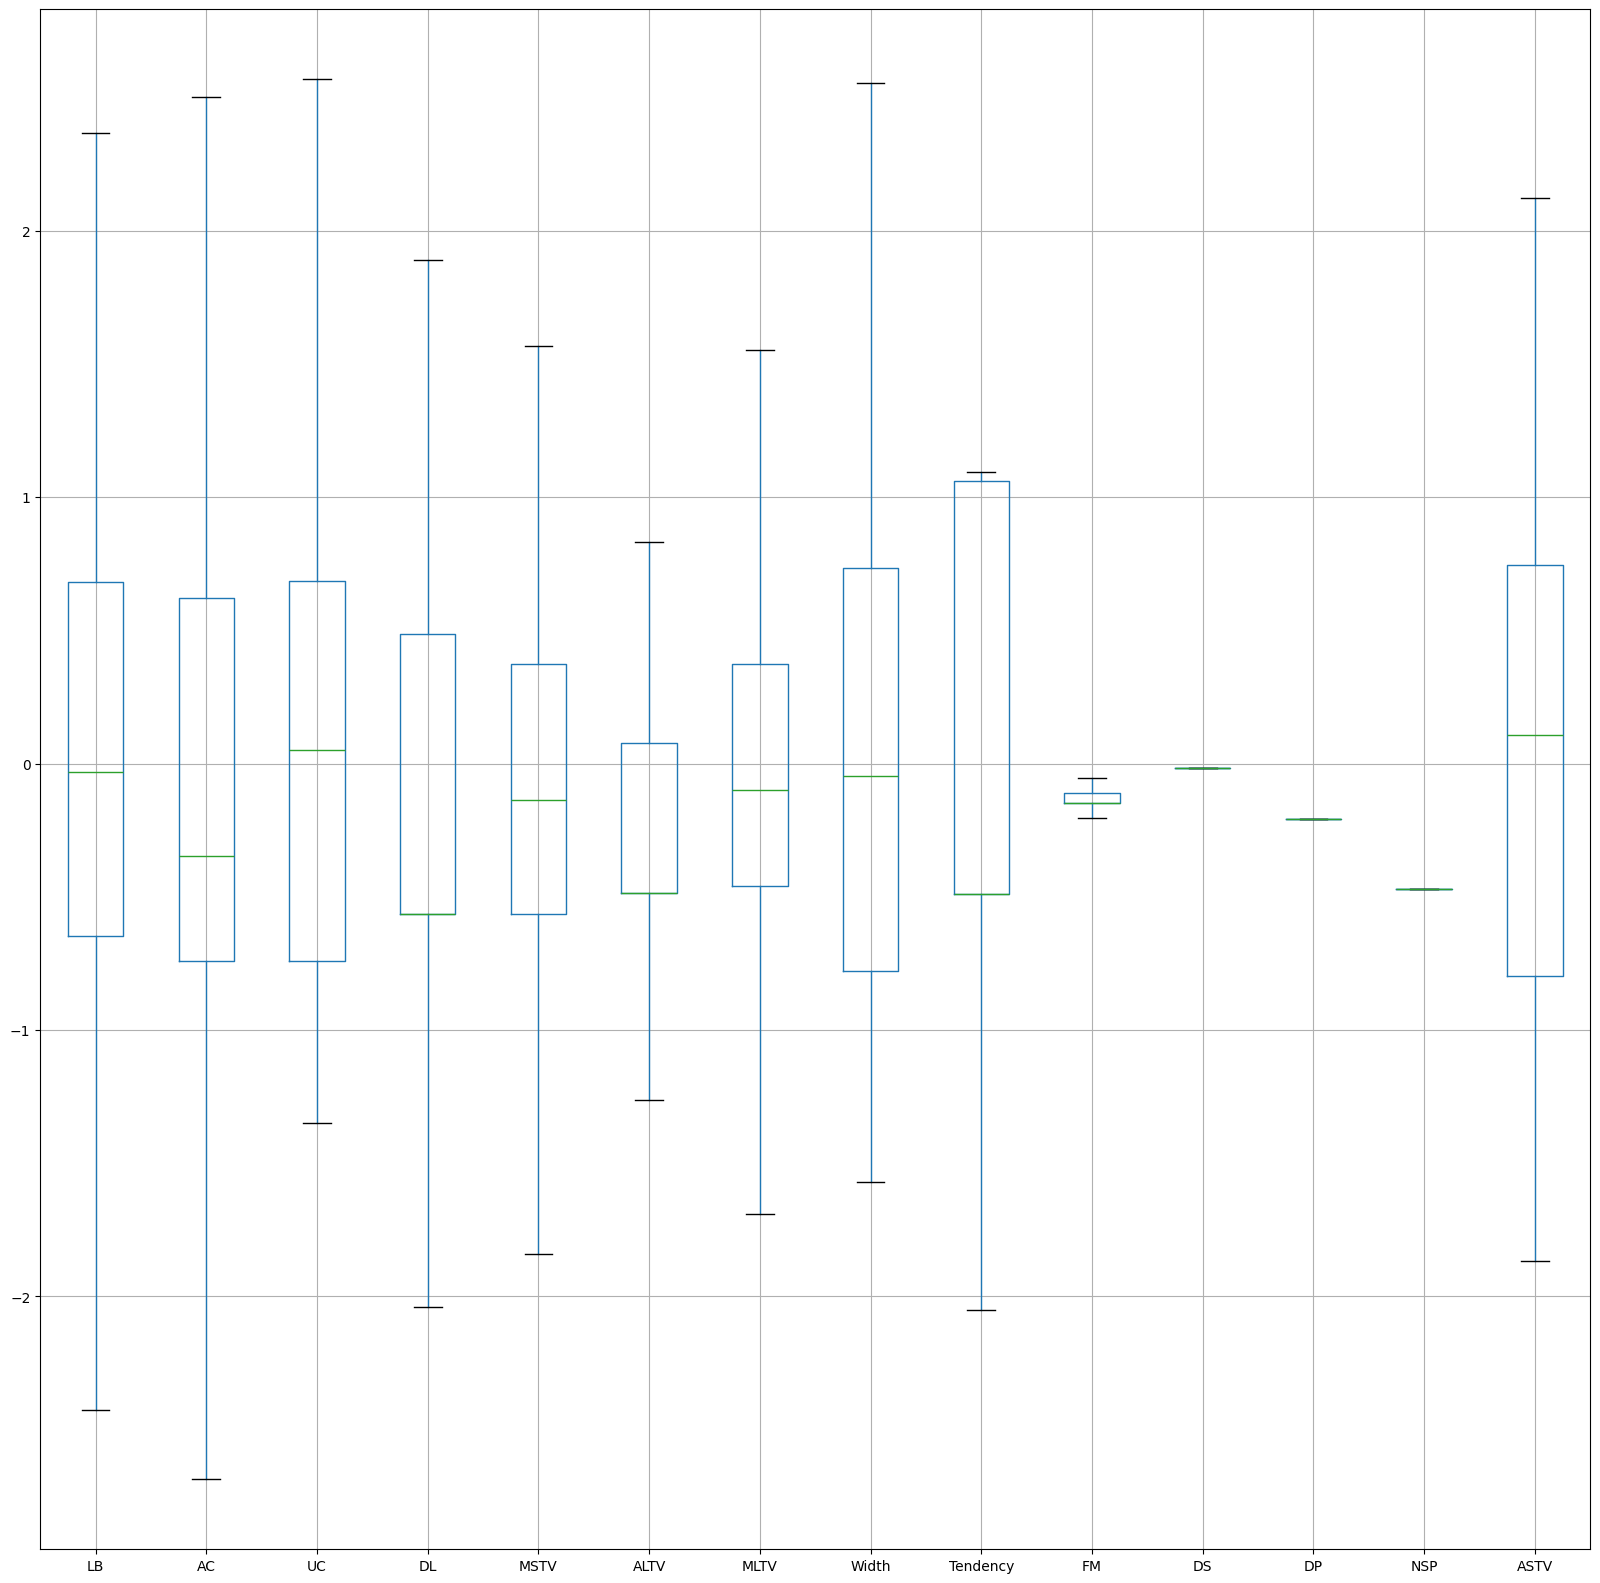

In [99]:
final_df.boxplot(figsize= (20,20))

In [98]:
final_df.fillna(final_df.mean() + 1 , inplace= True) #we got some columns where datas r missing , so let's fill those datas instead of removing them as the number of datas missing now is high

### EDA

<Figure size 2000x2000 with 0 Axes>

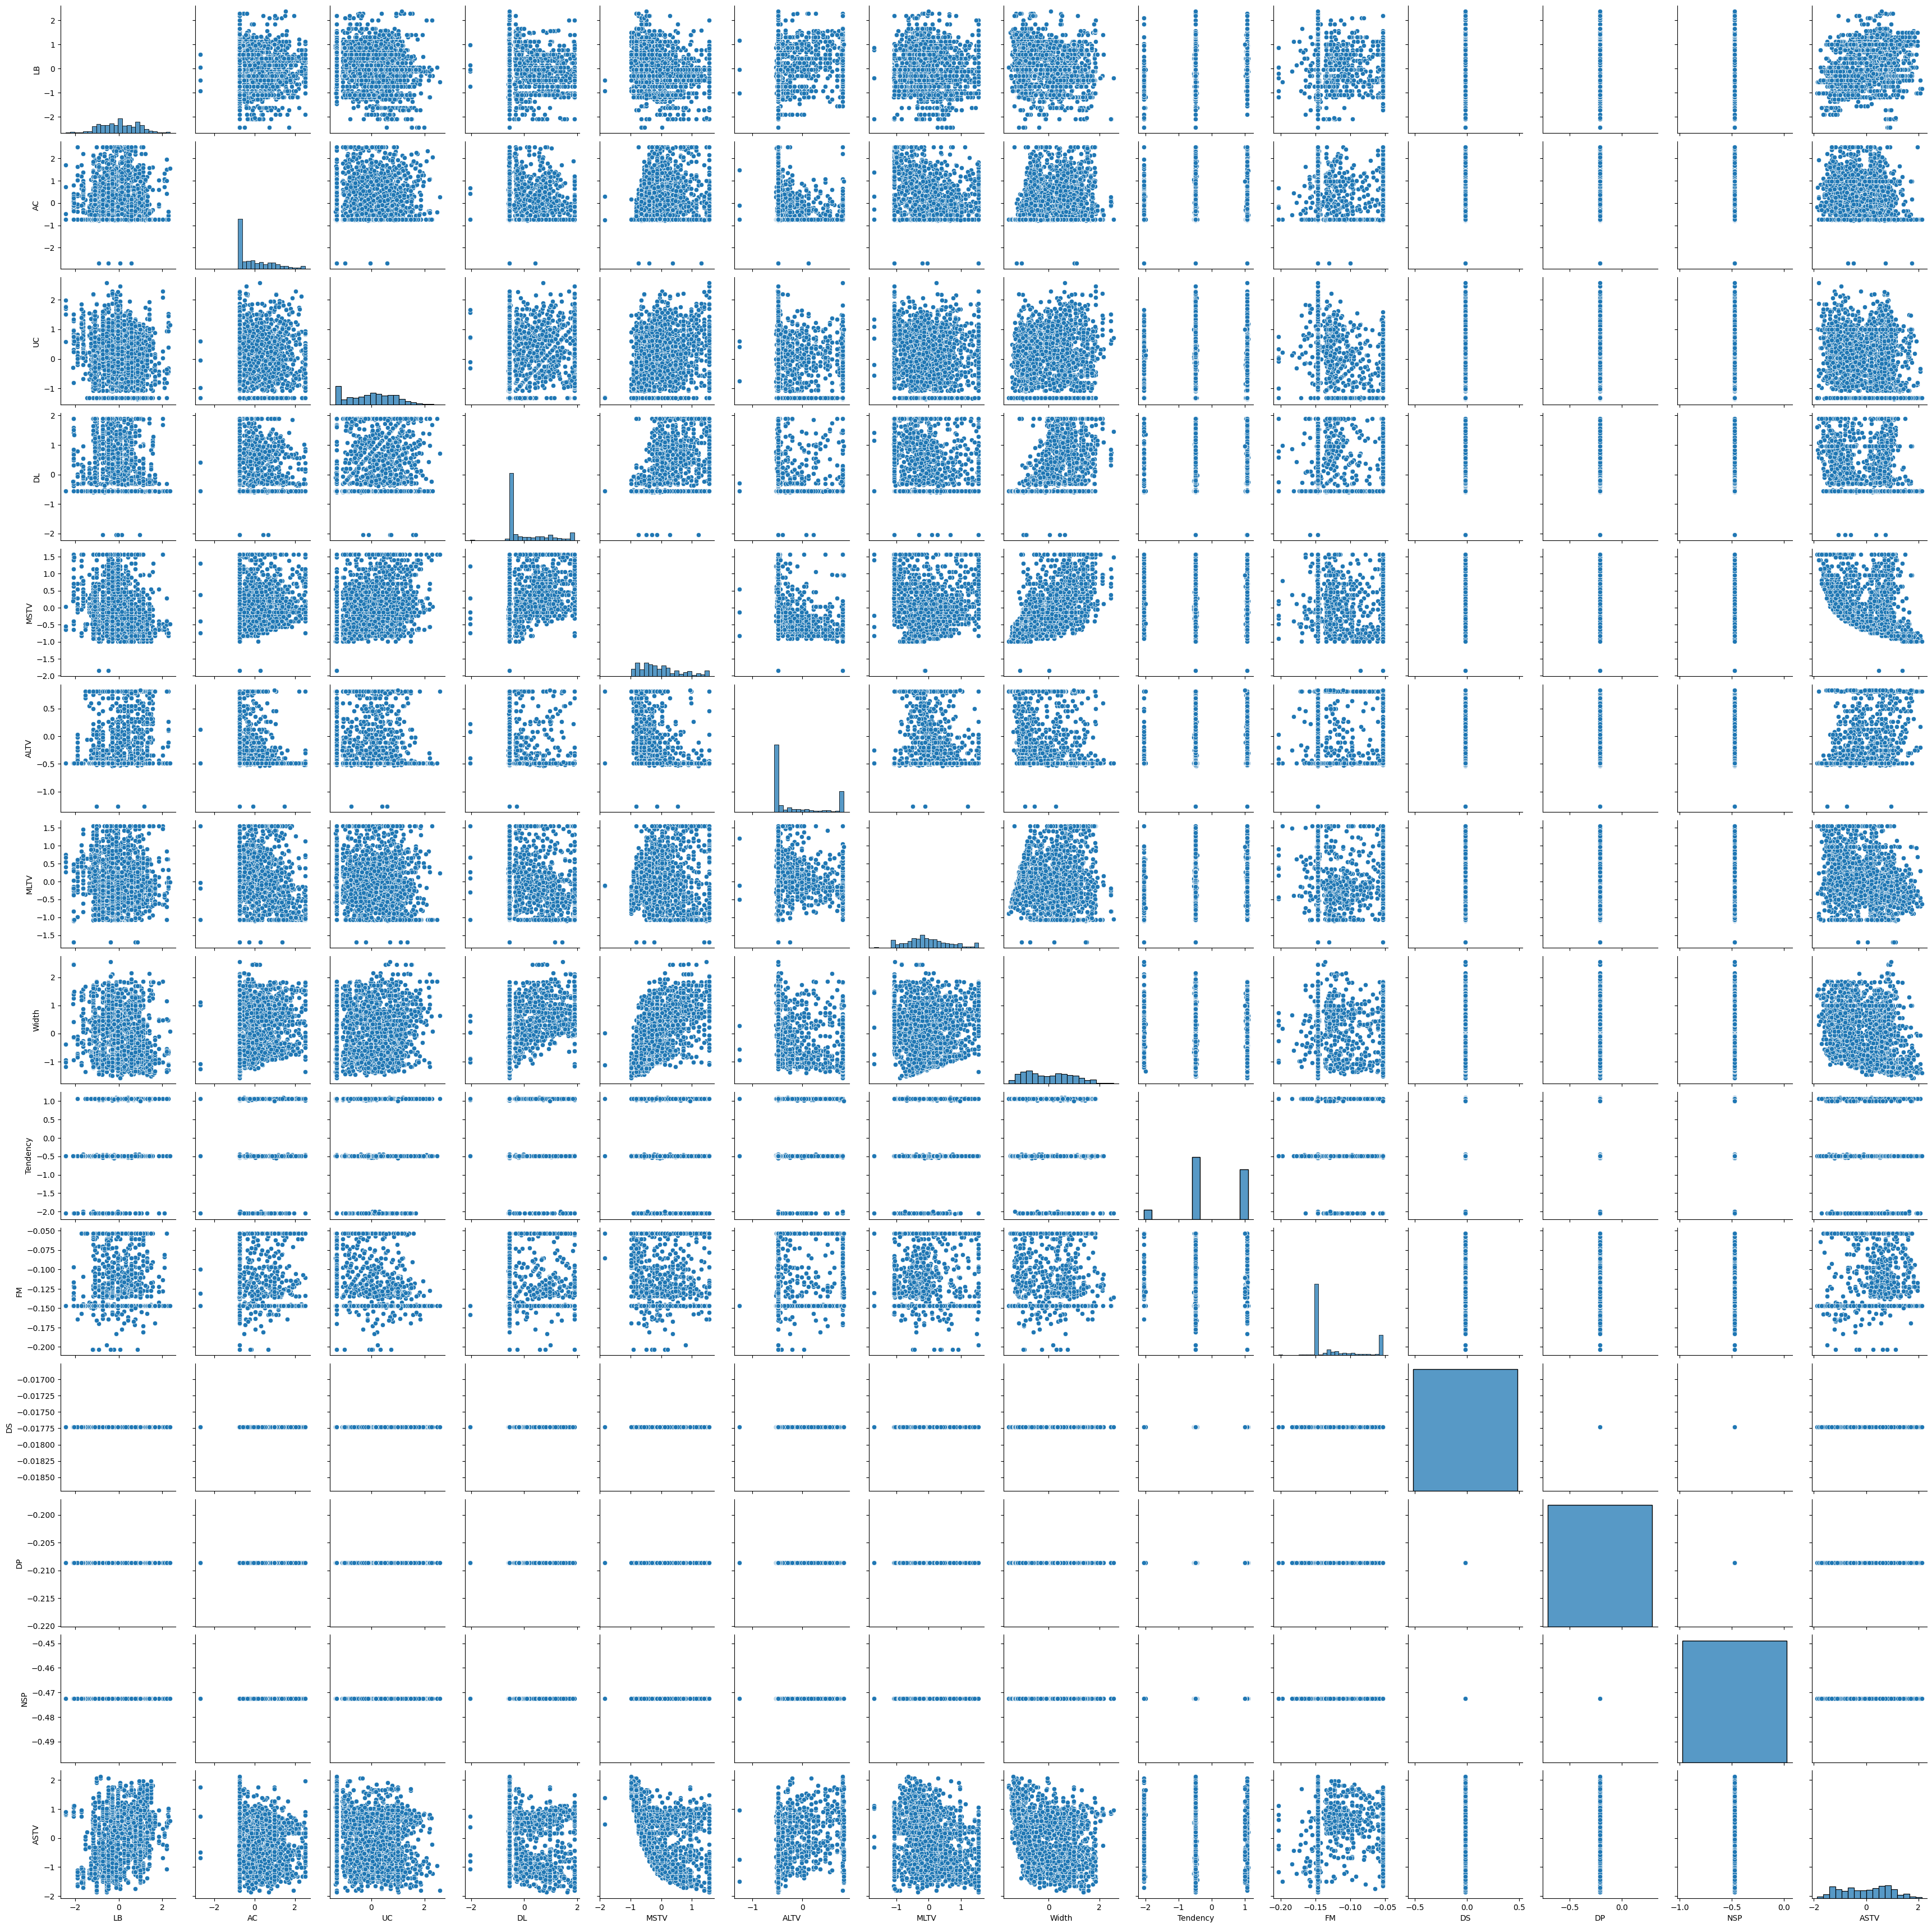

In [100]:
plt.figure(figsize = (20 , 20)) #relationship of each column with every columns
sns.pairplot(final_df)

<Axes: >

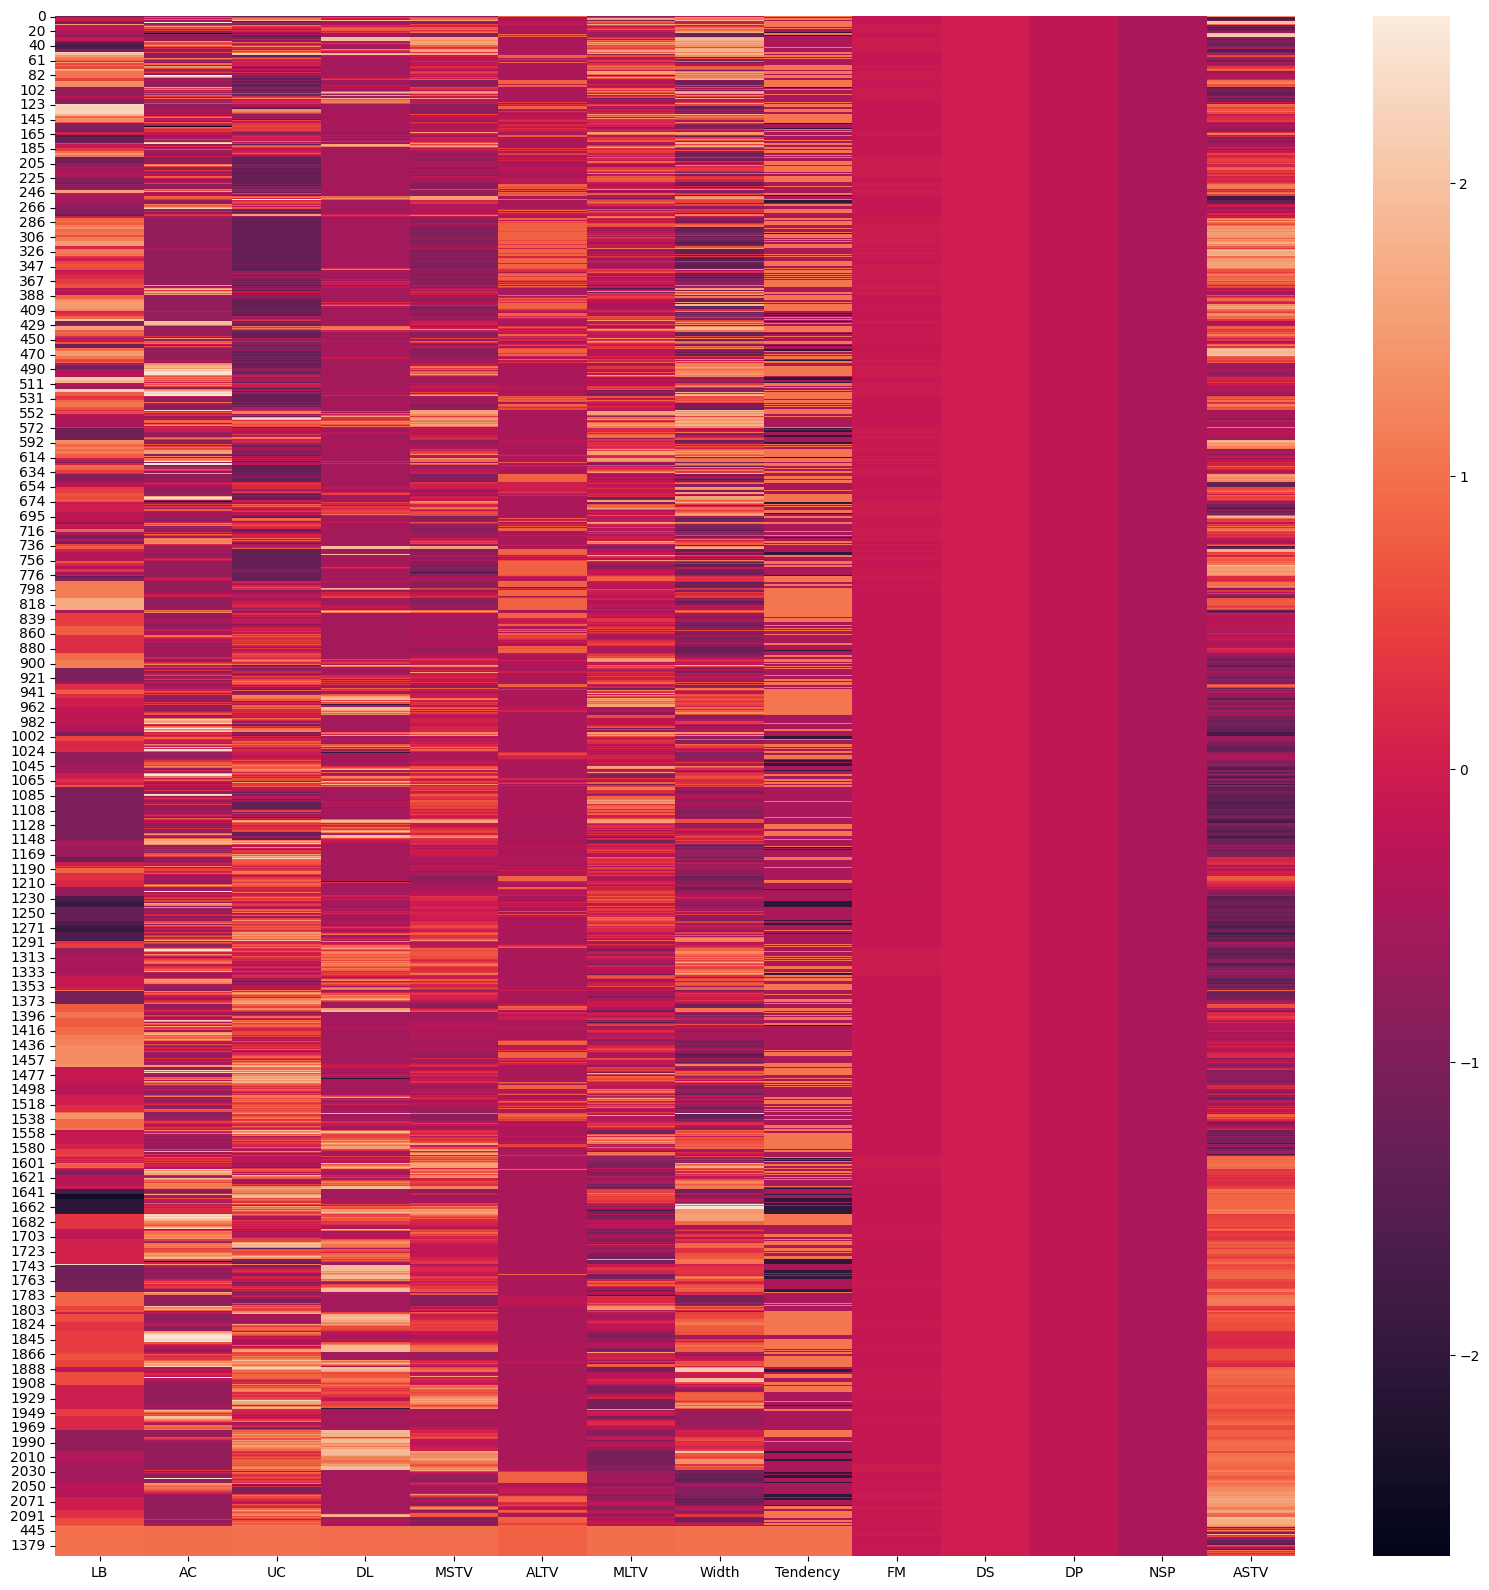

In [101]:
plt.figure(figsize = (20,20)) 
sns.heatmap(final_df)

In [103]:
from ydata_profiling import ProfileReport
prof = ProfileReport(final_df)
prof.to_file(output_file='output.html')

C:\Users\achar\anaconda3\envs\EXCELR\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.18it/s]


### The report is in the .html file